# **Introduction**


In This Project Discuss Pregnancy Data People might be interested in using the data to predict Pregnancy Data trends, Pregnancy data It is a method through which many important information can be known when a woman enters the hospital to give birth It is also a way that enables us to collect information about everything related to the mother and child like: pregnancy period,  Gestation, Mother's age, weight , height And bad Habits as smoke. The source of data https://www.openintro.org/ . One study, in particular, considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area And We Will use  Python  to Make a analysis Method.


# **Objective**


1-Identify factors that affect on Birth weight

2-identify range of gestation

3- Knowing the average of Birth weight in gestation.

4- Indicating if the mother's age has an effect on  Birth weight


# **Analytical questions**



**1- Descriptive questions**
calculate average (mean) and median weight, height.

What is the range of gestation? 

Are there any outliers in the dataset, and how do they affect the overall analysis?

calculate average (mean) and median BWT.

Calculate mean of  gestation


**2- Exploratory questions**

What is the most effective variable in BWT?

Is there a correlation between the mother's age and the baby's birth weight?

Is there a relationship between the mother's smoking status and the birth weight of the baby?

Is  BWT correlated with mother’s weight?

Is  BWT correlated with mother’s height?

Is  BWT correlated with parity  ?

Build regression models to predict birth weight based on relevant predictors.

Evaluate the significance of predictors and the overall model fit.


**3-predictive question**

Can we predict BWT in general based on existing variable .

Can we predict the highest variable that affects BWT.


# **Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from plotnine import ggplot, aes, geom_point, theme_minimal, labs, theme, element_blank
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.stats.diagnostic as ssd
import  statsmodels.stats.outliers_influence as oi
import statsmodels.stats.anova as av
import statsmodels.stats.oneway as ow
from statsmodels.tsa.stattools import adfuller
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

 **Read File**

In [3]:
bab = pd.read_csv("cleanning.ipynb (cbab).csv")

In [54]:
bab.head()

case    bwt   gestation  parity   age  height  weight  smoke
0   1.0  120.0  284.000000       0  27.0    62.0   100.0      0
1   2.0  113.0  282.000000       0  33.0    64.0   135.0      0
2   3.0  128.0  279.000000       0  28.0    64.0   115.0      1
3   4.0  123.0  276.600801       0  36.0    69.0   190.0      0
4   5.0  108.0  282.000000       0  23.0    67.0   125.0      1

**Explore Data**

In [55]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   float64
 1   bwt        1236 non-null   float64
 2   gestation  1236 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1236 non-null   float64
 5   height     1236 non-null   float64
 6   weight     1236 non-null   float64
 7   smoke      1236 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 77.4 KB


In [56]:
bab.describe()

case          bwt    gestation       parity          age  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean    618.500000   119.576861   279.318013     0.254854    27.253307   
std     356.946775    18.236452    15.955461     0.435956     5.777625   
min       1.000000    55.000000   148.000000     0.000000    15.000000   
25%     309.750000   108.750000   272.000000     0.000000    23.000000   
50%     618.500000   120.000000   280.000000     0.000000    26.000000   
75%     927.250000   131.000000   288.000000     1.000000    31.000000   
max    1236.000000   176.000000   353.000000     1.000000    45.000000   

            height       weight        smoke  
count  1236.000000  1236.000000  1236.000000  
mean     64.049533   128.604684     0.391586  
std       2.511168    20.709887     0.488302  
min      53.000000    87.000000     0.000000  
25%      62.000000   115.000000     0.000000  
50%      64.000000   125.000000     0.000000  
75%      66.000000   138.000000     1.000000  
max      72.000000   250.000000     1.000000

**change type for column smoke**

In [4]:
bab['smoke'].astype('int')

0       0
1       0
2       1
3       0
4       1
       ..
1231    0
1232    0
1233    1
1234    0
1235    0
Name: smoke, Length: 1236, dtype: int32

In [58]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   float64
 1   bwt        1236 non-null   float64
 2   gestation  1236 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1236 non-null   float64
 5   height     1236 non-null   float64
 6   weight     1236 non-null   float64
 7   smoke      1236 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 77.4 KB


**multicollinearity  test
if more than 10 so there multicollinearity,
if less than 10 so there non multicollinearity**

In [6]:
x=bab[['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight','smoke']]

In [7]:
vif = [oi.variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

[4.212405563299785,
 57.69723034525732,
 269.3499907740193,
 1.6223397441715615,
 26.370145137248866,
 315.13821259596733,
 49.52251719722769,
 1.7721224817885808]

## **Exploratry Analysis**

**Heatmap to see correlation 
DarkRed is perfect  positive correlation 
blue is negitive perfect correlation**

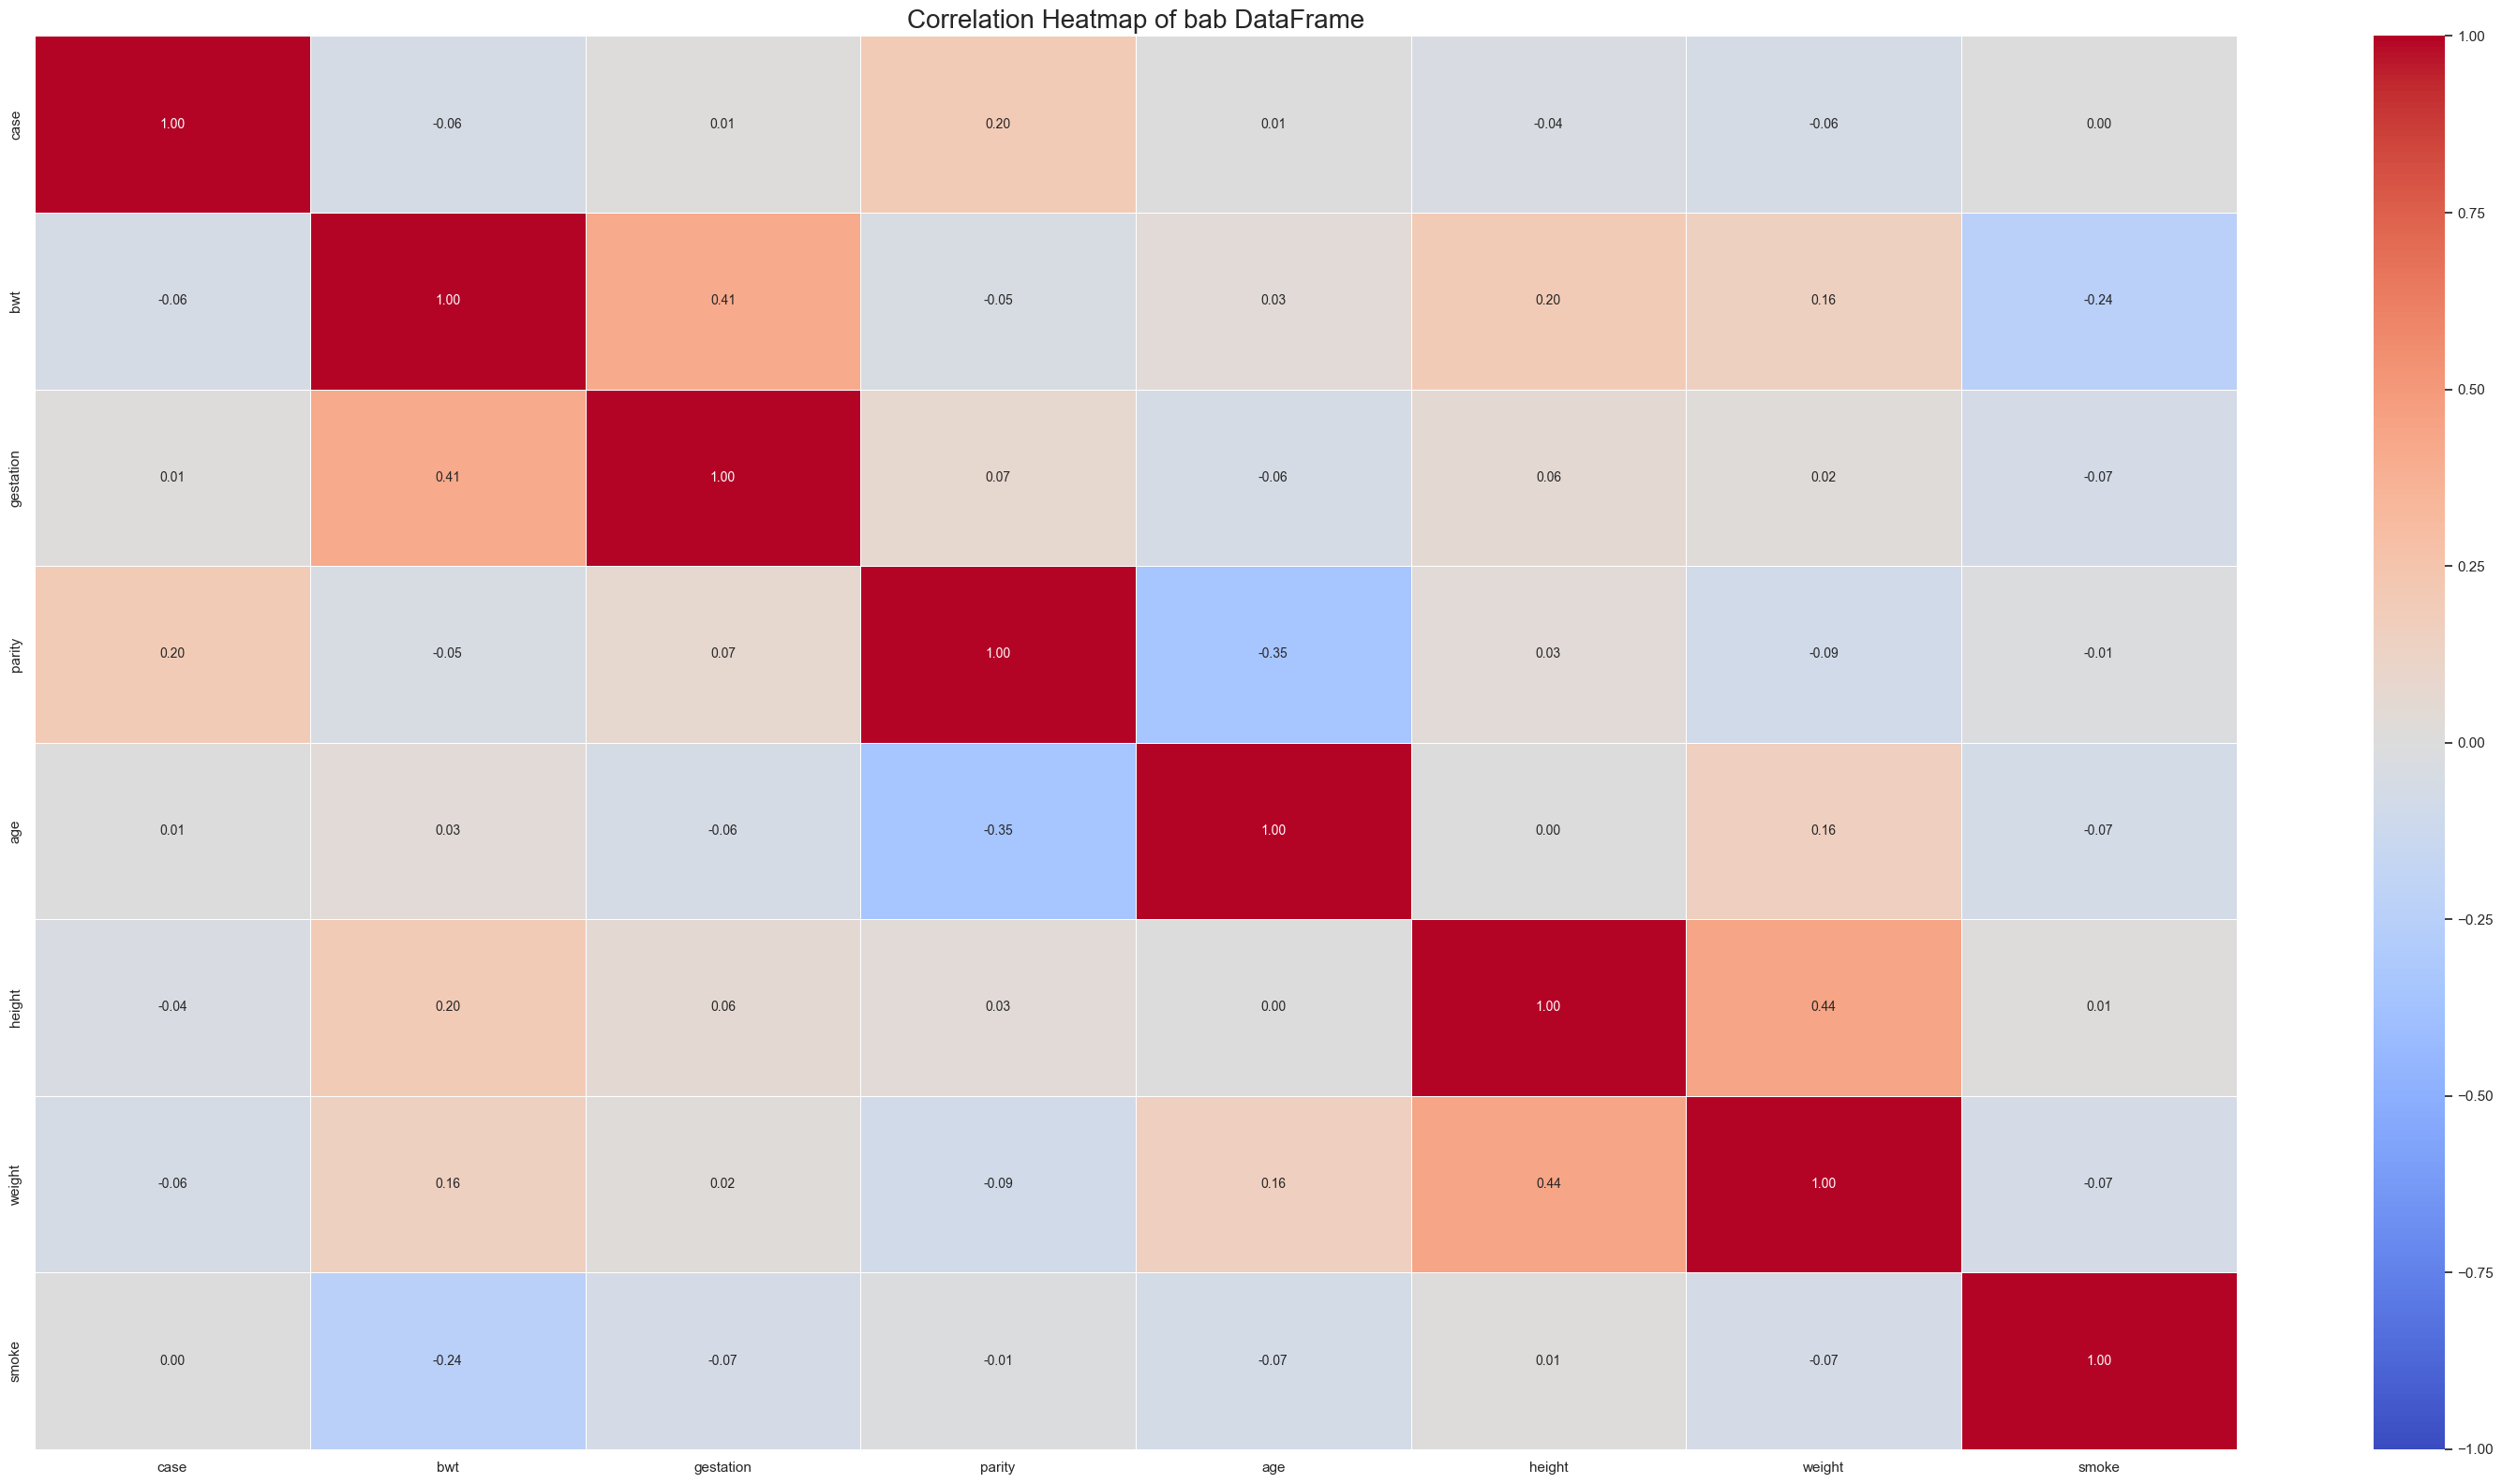

In [61]:

sns.set_theme()
sns.set_palette("coolwarm") 

plt.figure(figsize=(30, 16))
heatmap = sns.heatmap(bab.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)


for text in heatmap.texts:
    text.set_size(10)


plt.title("Correlation Heatmap of bab DataFrame", fontsize=20)


plt.tight_layout()


plt.show()


**pie chart** 

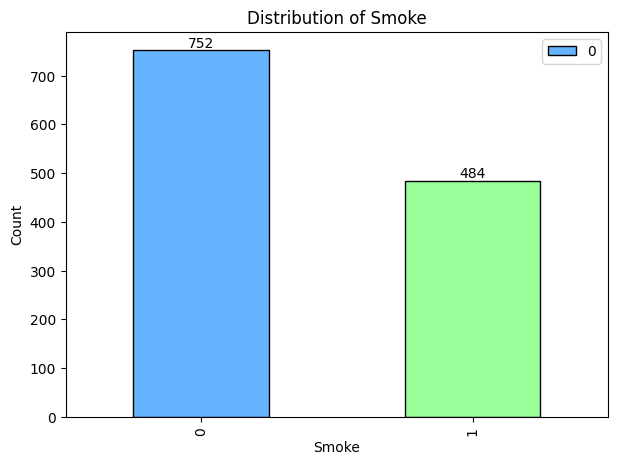

In [8]:
plt.figure(figsize=(7, 5))
colors = ['#66b3ff', '#99ff99']  

# Plot the bar chart
ax = bab['smoke'].value_counts().plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.title('Distribution of Smoke')
plt.xlabel('Smoke')
plt.ylabel('Count')

# Add data labels on top of the bars
for i, value in enumerate(bab['smoke'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Add legend
plt.legend(labels=bab['smoke'].value_counts().index, loc='upper right')

# Display the chart
plt.show()



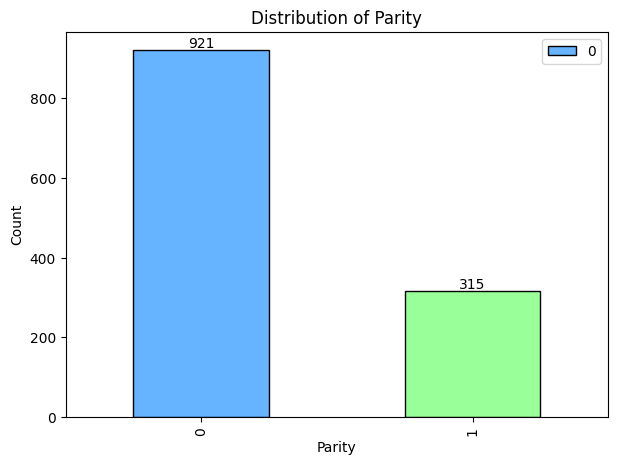

In [9]:
plt.figure(figsize=(7, 5))
colors = ['#66b3ff', '#99ff99']  

# Plot the bar chart
ax = bab['parity'].value_counts().plot(kind='bar', color=colors, edgecolor='black')

# Add labels and title
plt.title('Distribution of Parity')
plt.xlabel('Parity')
plt.ylabel('Count')

# Add data labels on top of the bars
for i, value in enumerate(bab['parity'].value_counts()):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Add legend
plt.legend(labels=bab['parity'].value_counts().index, loc='upper right')

# Display the chart
plt.show()


**scatter matrix to see realtion between two varaible**

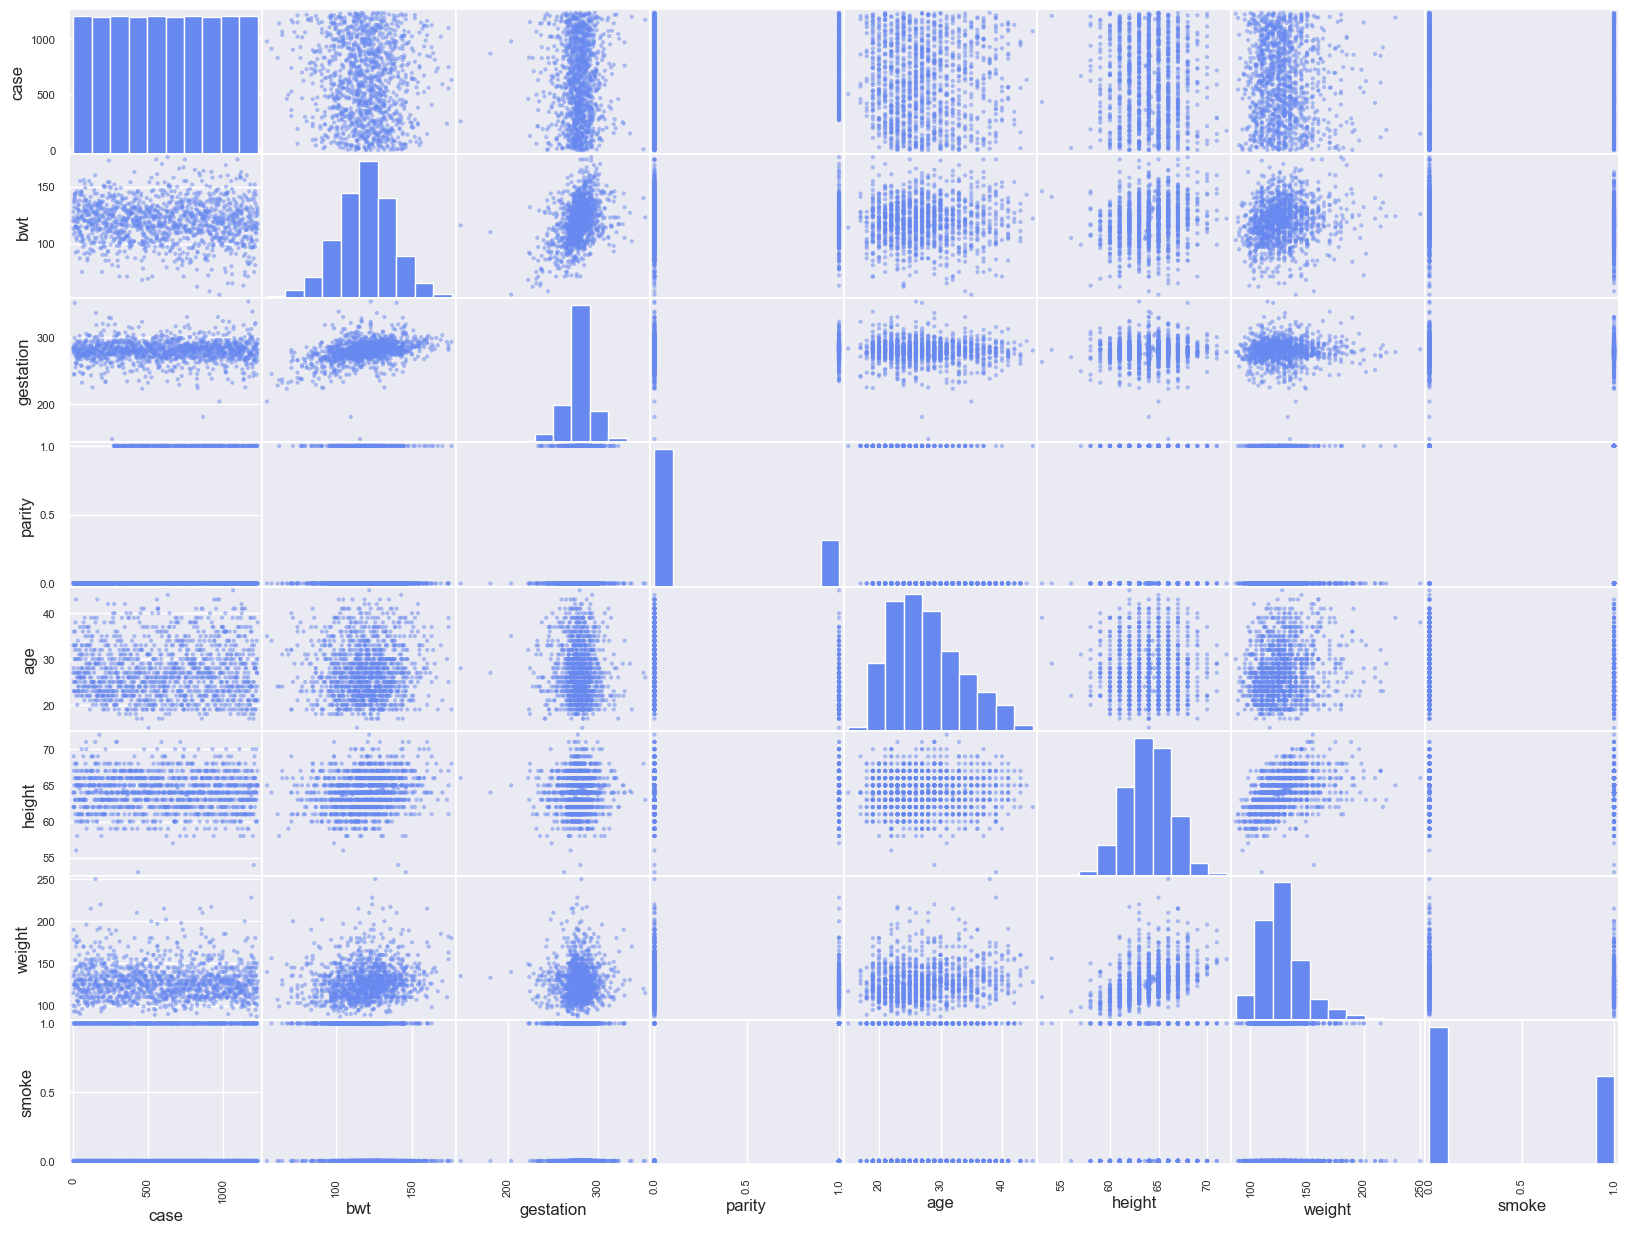

In [64]:
pd.plotting.scatter_matrix(bab,figsize=(20,15),diagonal="hist")
plt.show()

**BoxPlot**


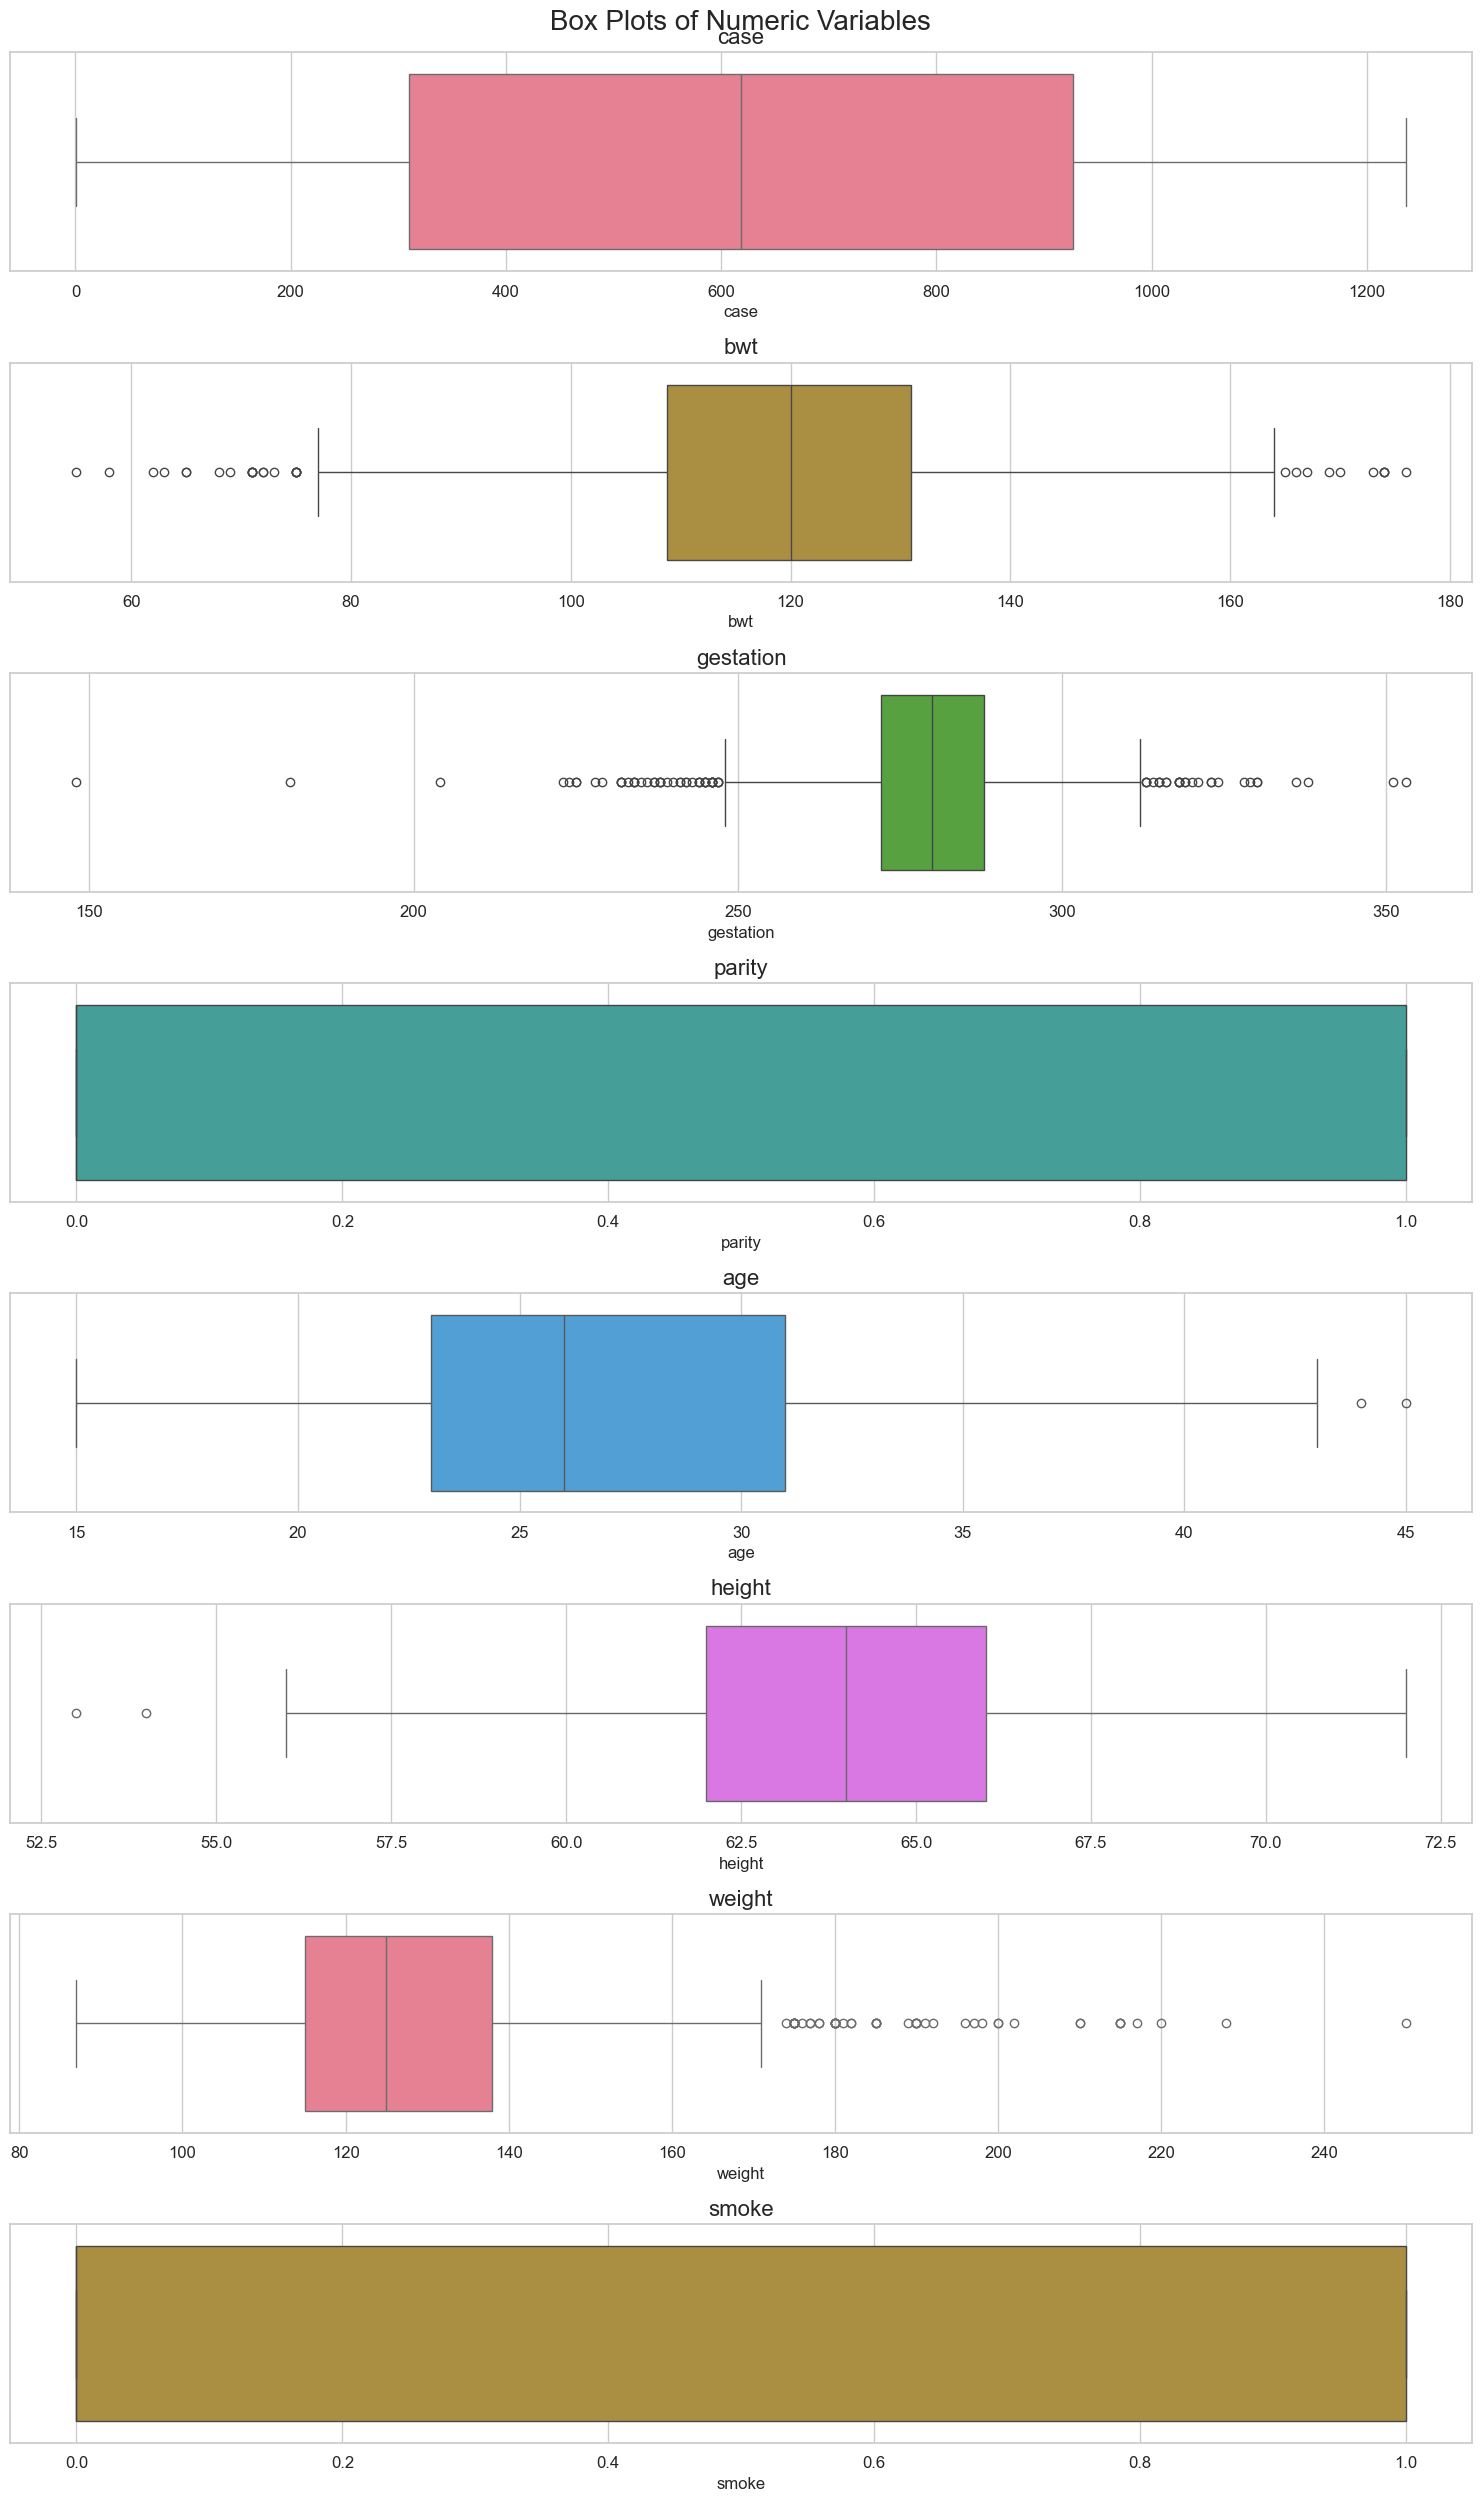

In [20]:

fig, axes = plt.subplots(nrows=len(bab.columns), figsize=(15, 25), sharex=False)


sns.set(style="whitegrid")

# Define a color palette for the box plots
custom_palette = sns.color_palette("husl")

for i, column in enumerate(bab.columns):
    sns.boxplot(x=bab[column], ax=axes[i], color=custom_palette[i % len(custom_palette)])
    axes[i].set_title(column, fontsize=16)
    axes[i].tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Box Plots of Numeric Variables", y=1, fontsize=20)
plt.show()


**Histogram for each varible**

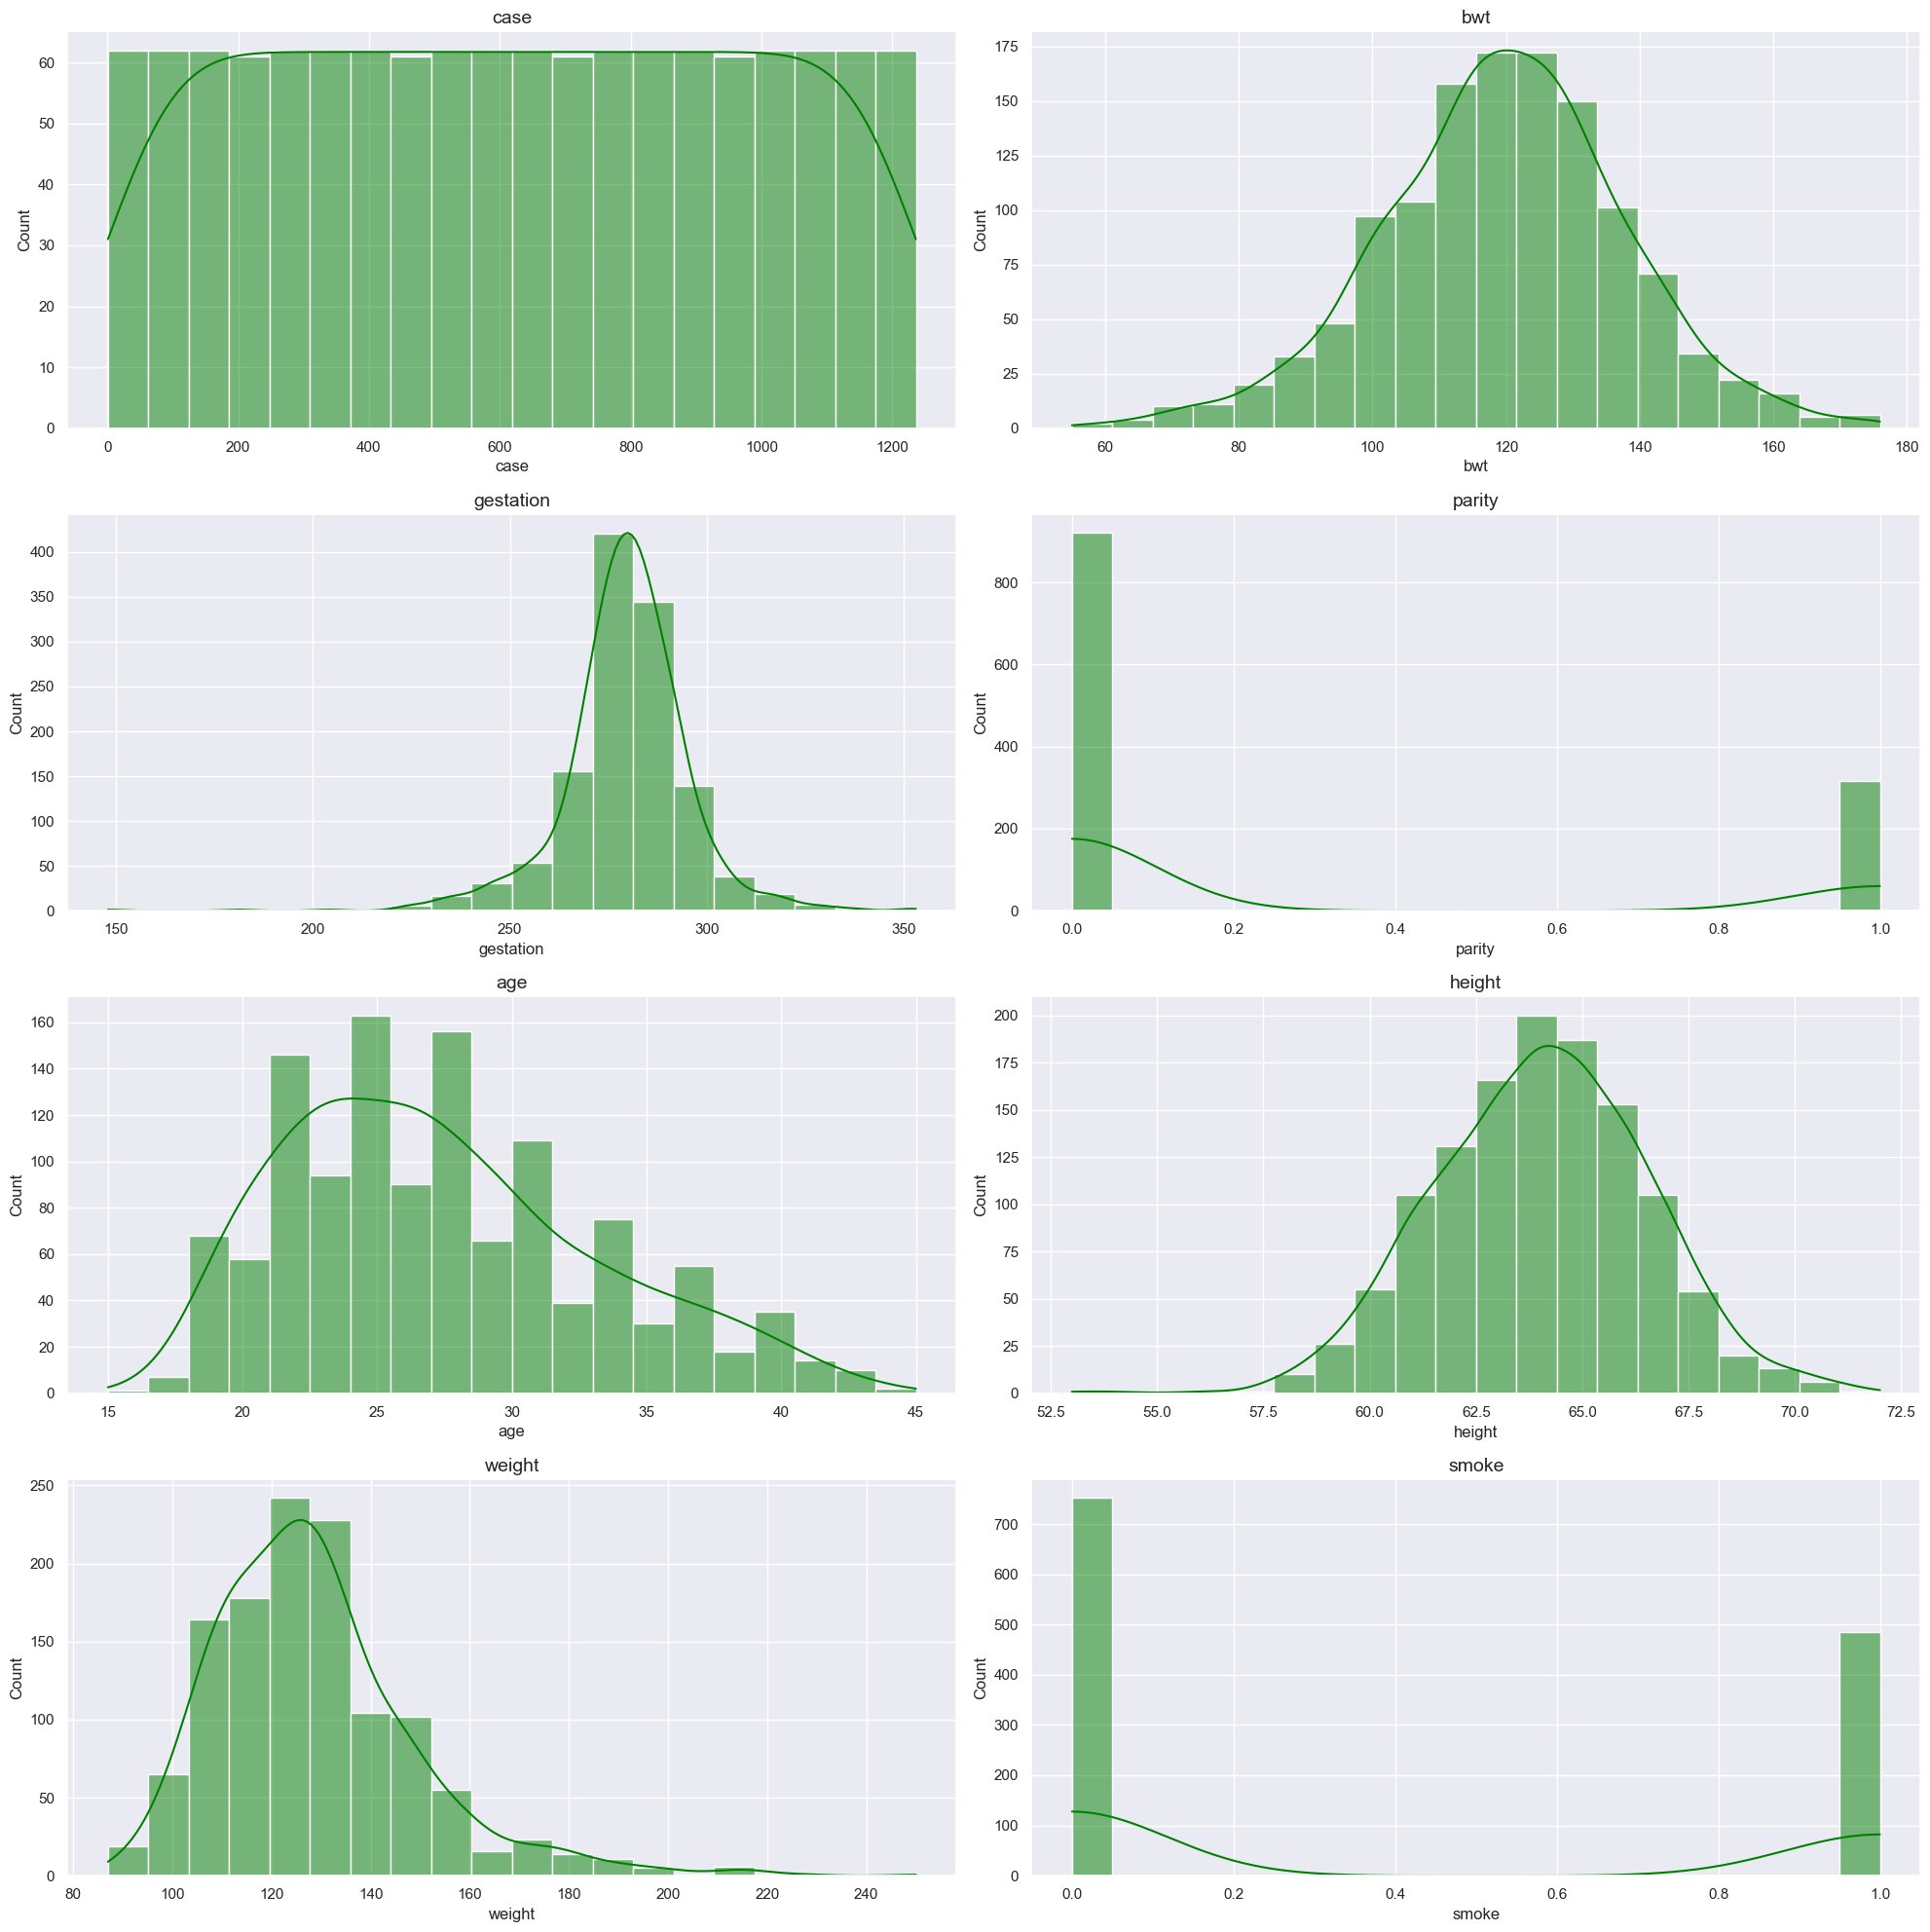

In [66]:

sns.set_theme()
sns.set_palette("pastel")  

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through columns and create histograms
for i, column in enumerate(bab.columns):
    sns.histplot(bab[column], ax=axes[i], kde=True, color='green', bins=20)
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### **multipyle linear regression**

**H0 : (no linear relationship between depnedant variabels and indepnedant)

H1 : (linear relationship between depnedant variabels and indepnedant)

alpha = 0.05**

In [67]:
bab_model = smf.ols('(bwt) ~ age + gestation + weight + height',data =bab).fit()
bab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     79.71
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           3.45e-60
Time:                        19:40:16   Log-Likelihood:                -5199.6
No. Observations:                1236   AIC:                         1.041e+04
Df Residuals:                    1231   BIC:                         1.043e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.9398     14.492     -5.930      0.000    -114.371     -57.509
age            0.1347      0.082      1.651      0.099      -0.025       0.295
gestation      0.4589      0.029     15.750      0.000       0.402       0.516
weight         0.0699      0.025      2.766      0.006       0.020       0.120
height         1.0099      0.206      4.897      0.000       0.605       1.415
==============================================================================
Omnibus:                        2.780   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.949
Skew:                           0.029   Prob(JB):                        0.229
Kurtosis:                       3.232   Cond. No.                     9.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject H0 ,age accept H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [68]:
bmb_hetro = ssd.het_breuschpagan(bab_model.resid,bab_model.model.exog)
bmb_hetro_test_statistic, bmb_hetro_p_value = bmb_hetro[:2]
bmb_hetro_test_statistic, bmb_hetro_p_value

(23.67857726090851, 9.264100123998126e-05)

## **weighted least square bab_model_weight**

In [69]:
waight =1/(bab_model.resid**2)
bab_model_weight = smf.wls('(bwt) ~ age + gestation + weight + height',data=bab,weights=waight).fit()
bab_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.490e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:16   Log-Likelihood:                -4360.3
No. Observations:                1236   AIC:                             8731.
Df Residuals:                    1231   BIC:                             8756.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.4744      0.690   -123.866      0.000     -86.828     -84.121
age            0.1321      0.003     40.958      0.000       0.126       0.138
gestation      0.4585      0.001    417.578      0.000       0.456       0.461
weight         0.0697      0.001     99.557      0.000       0.068       0.071
height         1.0054      0.009    113.636      0.000       0.988       1.023
==============================================================================
Omnibus:                     4579.481   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.235
Skew:                          -0.038   Prob(JB):                     2.72e-45
Kurtosis:                       1.005   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**All Reject H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [70]:
bmbww_hetro = ssd.het_breuschpagan(bab_model_weight.resid,bab_model_weight.model.exog)
bmbww_hetro_test_statistic, bmbww_hetro_p_value = bmbww_hetro[:2]
bmbww_hetro_test_statistic, bmbww_hetro_p_value

(23.677507184089862, 9.268671839746486e-05)

**to show assumption**

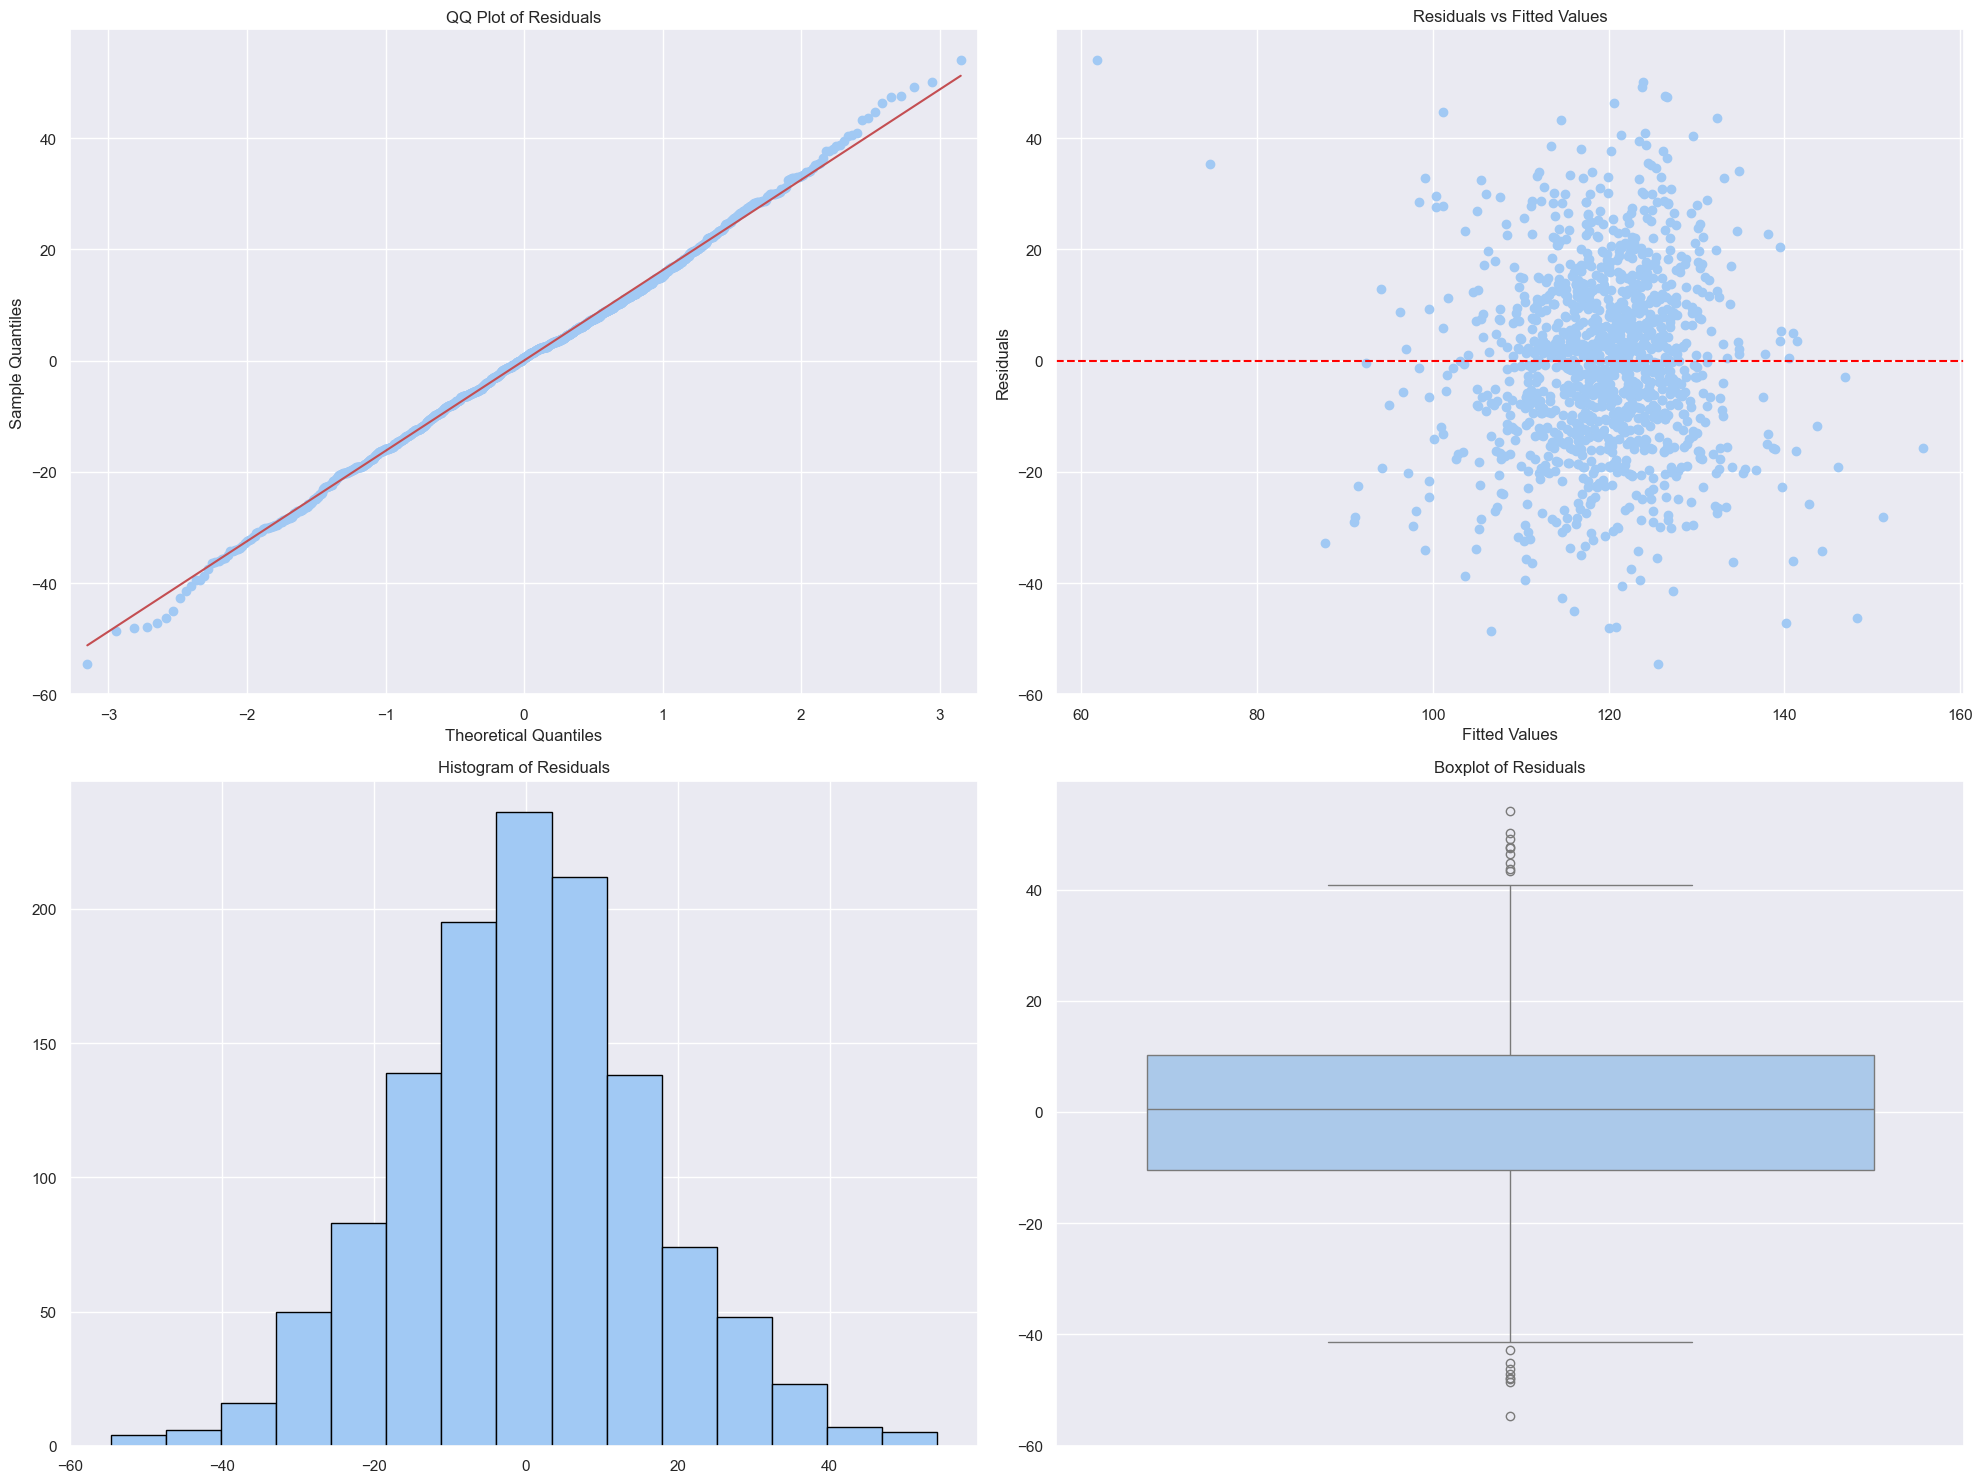

In [71]:
residuals = bab_model_weight.resid
fitted = bab_model_weight.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

In [72]:
bab.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

**remove outlier**

In [73]:
quantiles = bab.quantile([0.1, 0.9])
low = quantiles.loc[0.1]
high = quantiles.loc[0.9]

df = bab[(bab >= low) & (bab <= high)]


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       988 non-null    float64
 1   bwt        998 non-null    float64
 2   gestation  997 non-null    float64
 3   parity     1236 non-null   int64  
 4   age        1052 non-null   float64
 5   height     1047 non-null   float64
 6   weight     1004 non-null   float64
 7   smoke      1236 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 77.4 KB


In [75]:
bab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   float64
 1   bwt        1236 non-null   float64
 2   gestation  1236 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1236 non-null   float64
 5   height     1236 non-null   float64
 6   weight     1236 non-null   float64
 7   smoke      1236 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 77.4 KB


**we make multiple imputaion for variable that have missing**

In [76]:
imputer = IterativeImputer()
fit_imput = imputer.fit_transform(df)
cdf = pd.DataFrame(fit_imput, columns = df.columns)

**BoxPlot after Outlier and impute**

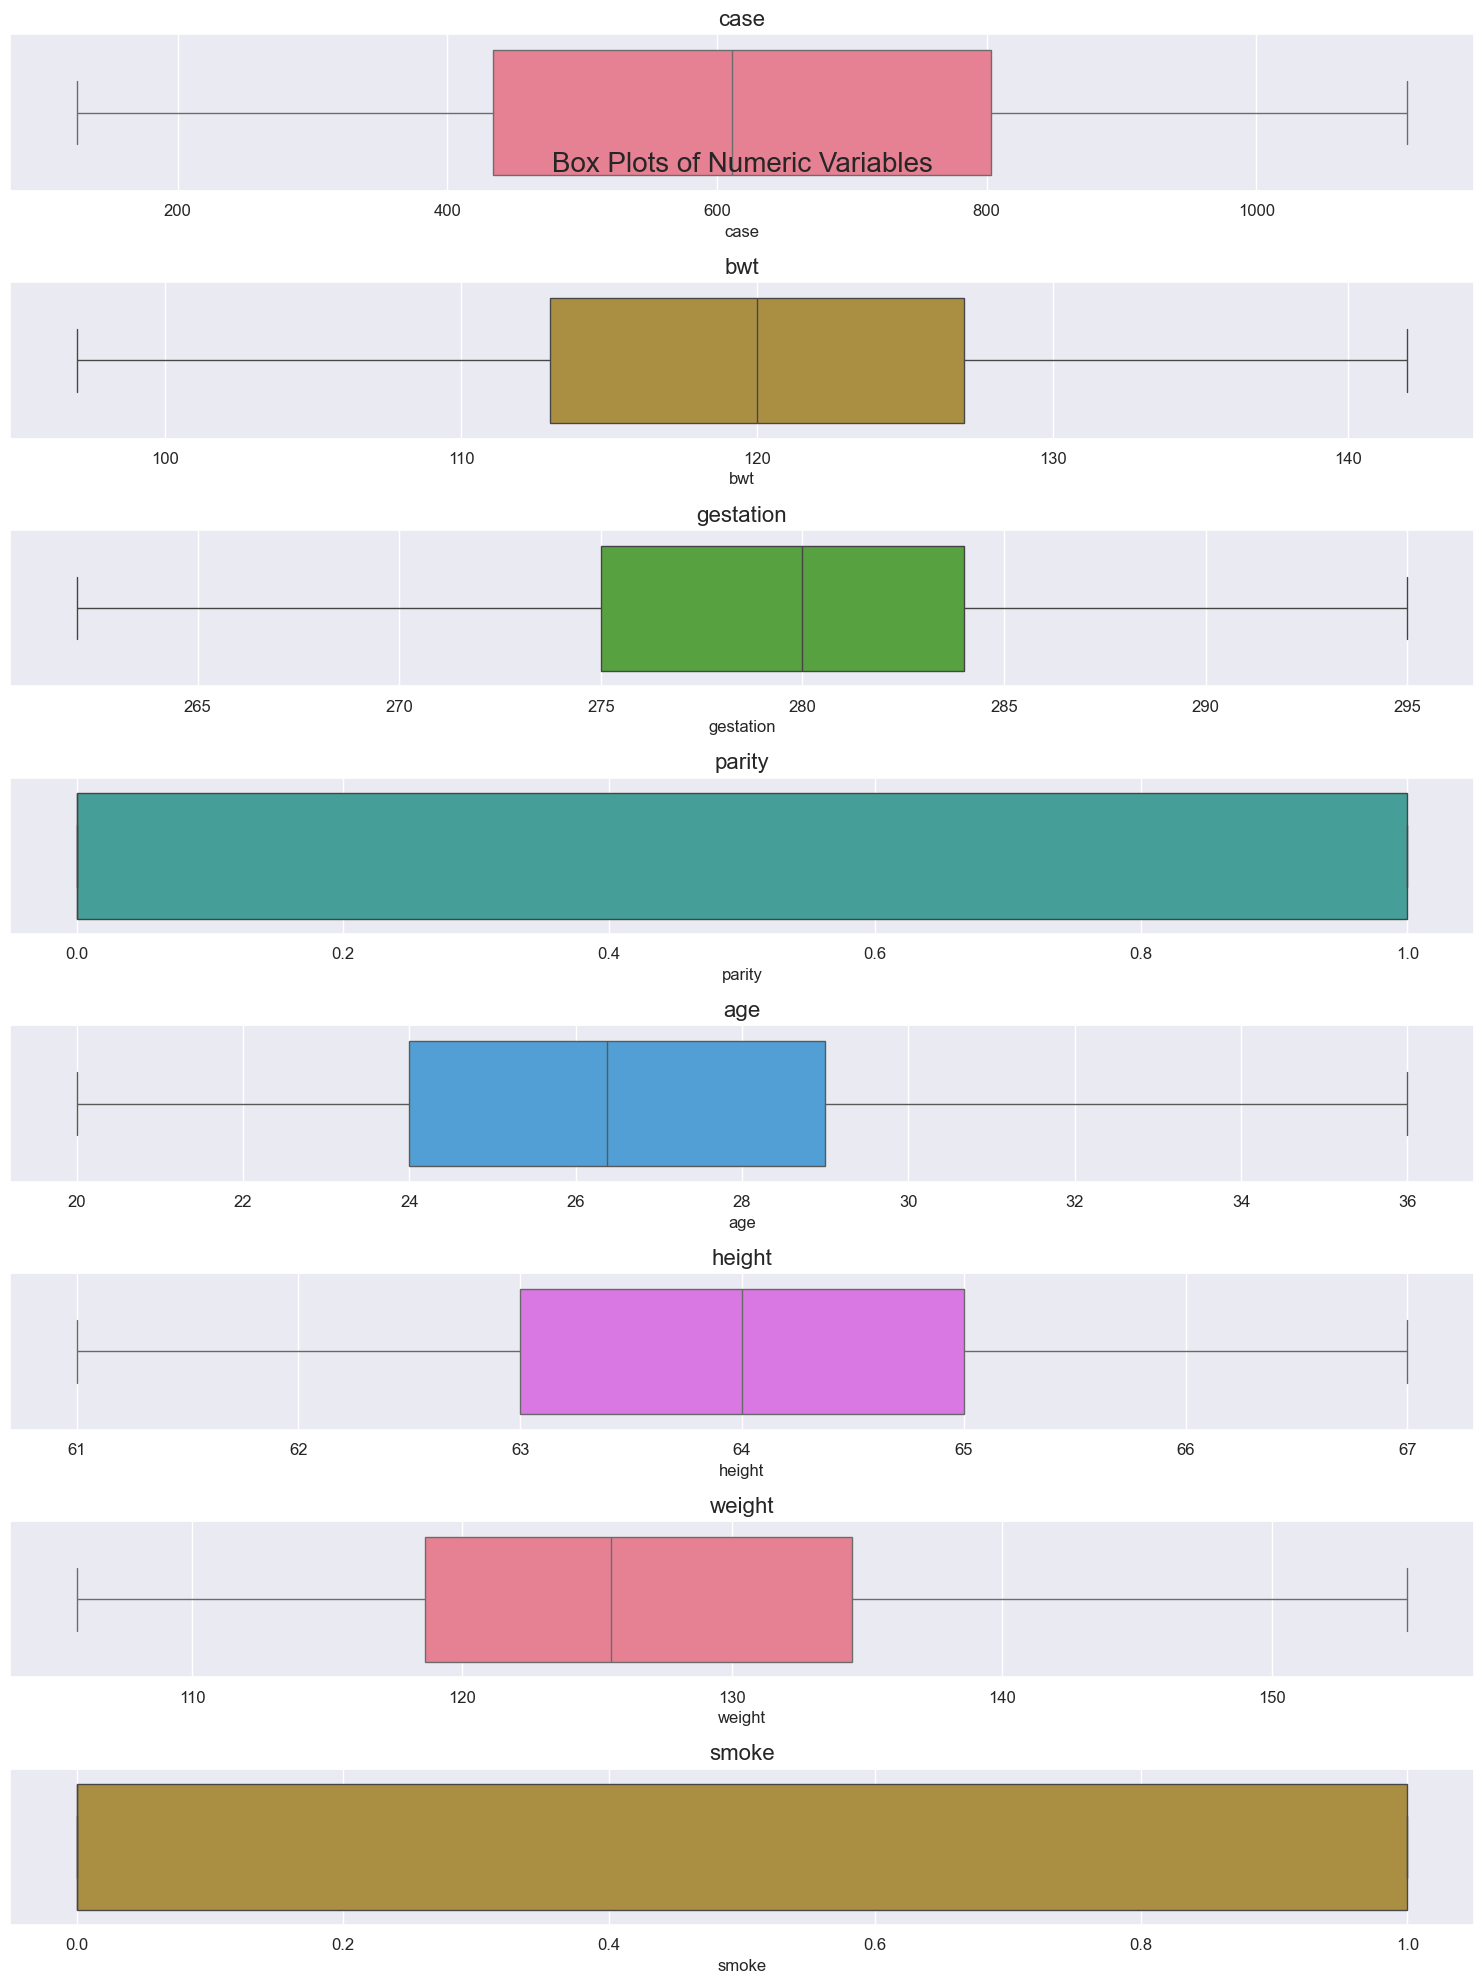

In [77]:

fig, axes = plt.subplots(nrows=len(cdf.columns), figsize=(15, 20), sharex=False)


sns.set(style="whitegrid")

# Define a color palette for the box plots
custom_palette = sns.color_palette("husl")

for i, column in enumerate(bab.columns):
    sns.boxplot(x=cdf[column], ax=axes[i], color=custom_palette[i % len(custom_palette)])
    axes[i].set_title(column, fontsize=16)
    axes[i].tick_params(labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.suptitle("Box Plots of Numeric Variables", y=0.92, fontsize=20)
plt.show()

In [78]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   float64
 1   bwt        1236 non-null   float64
 2   gestation  1236 non-null   float64
 3   parity     1236 non-null   float64
 4   age        1236 non-null   float64
 5   height     1236 non-null   float64
 6   weight     1236 non-null   float64
 7   smoke      1236 non-null   float64
dtypes: float64(8)
memory usage: 77.4 KB


**we make cbab_model after outlier**

In [79]:
cbab_model = smf.ols('(bwt) ~ age + gestation + weight + height',data =cdf).fit()
cbab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     54.92
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.20e-42
Time:                        19:40:19   Log-Likelihood:                -4576.3
No. Observations:                1236   AIC:                             9163.
Df Residuals:                    1231   BIC:                             9188.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.0947     14.884     -5.516      0.000    -111.296     -52.894
age            0.1060      0.070      1.508      0.132      -0.032       0.244
gestation      0.4742      0.039     12.306      0.000       0.399       0.550
weight         0.0881      0.027      3.261      0.001       0.035       0.141
height         0.8600      0.183      4.710      0.000       0.502       1.218
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.741
Skew:                          -0.062   Prob(JB):                        0.419
Kurtosis:                       2.864   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject  H0 except age accept H0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

rejectH0**

In [80]:
bibaf_hetro = ssd.het_breuschpagan(cbab_model.resid,cbab_model.model.exog)
bibaf_hetro_test_statistic, bibaf_hetro_p_value = bibaf_hetro[:2]
bibaf_hetro_test_statistic, bibaf_hetro_p_value

(4.590907941960699, 0.3319038246567353)

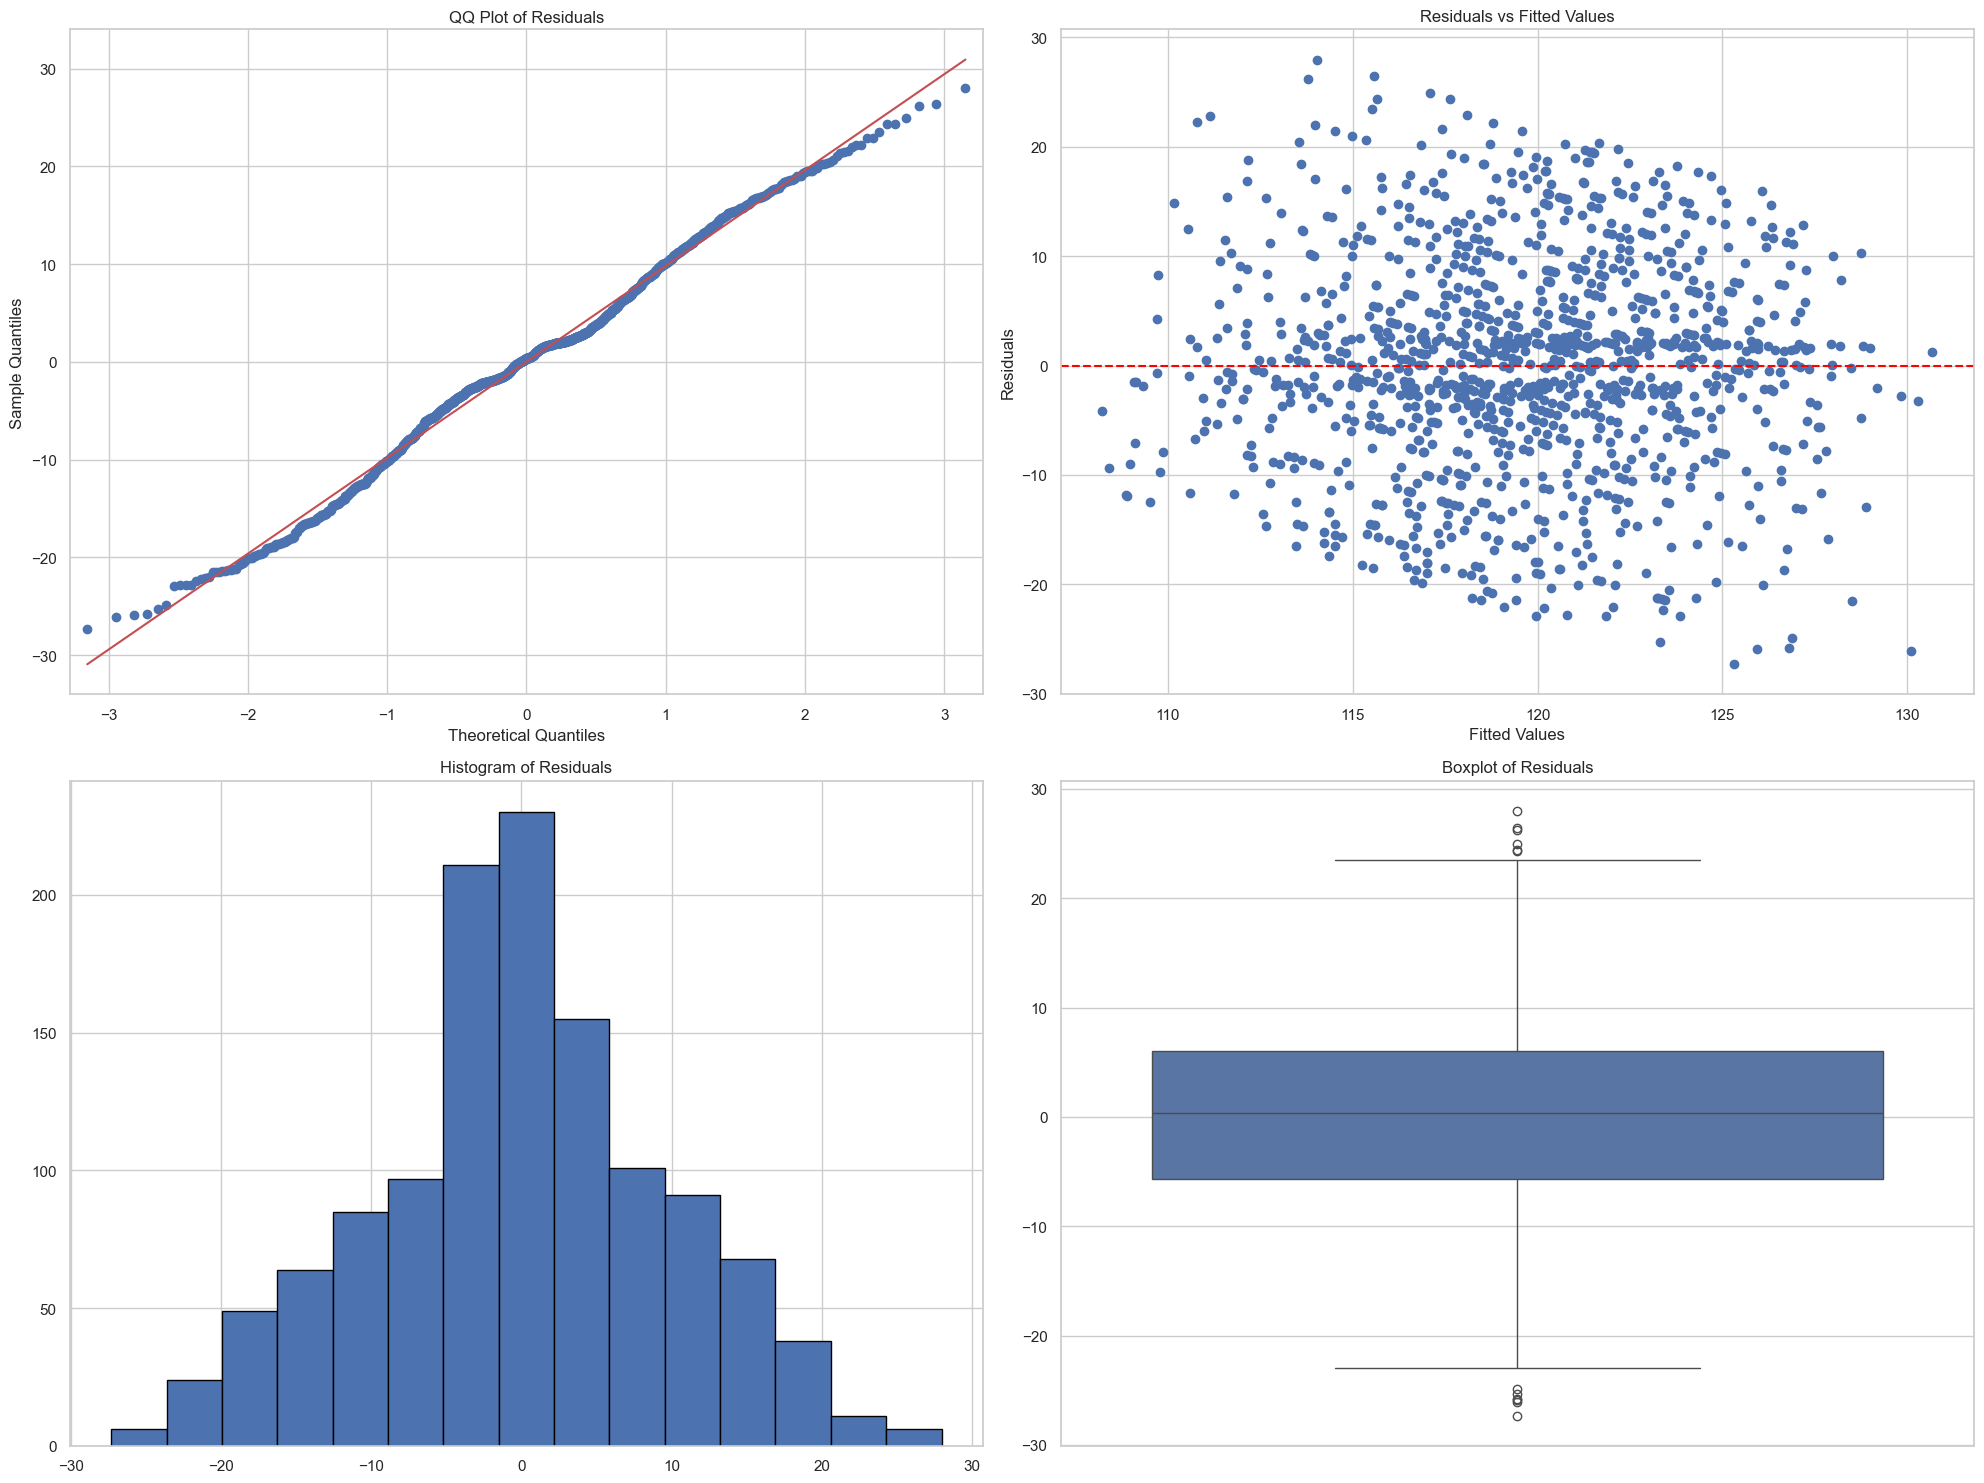

In [81]:
residuals = cbab_model.resid
fitted = cbab_model.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**Weight least square after outlier**

In [82]:
waight =1/(cbab_model.resid**2)
cdf_model_weight = smf.wls('(bwt) ~ age + gestation + weight + height',data=cdf,weights=waight).fit()
cdf_model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.723e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:19   Log-Likelihood:                -3680.6
No. Observations:                1236   AIC:                             7371.
Df Residuals:                    1231   BIC:                             7397.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6464      0.696   -117.246      0.000     -83.013     -80.280
age            0.1088      0.003     34.929      0.000       0.103       0.115
gestation      0.4741      0.001    373.793      0.000       0.472       0.477
weight         0.0877      0.001    173.632      0.000       0.087       0.089
height         0.8533      0.008    107.581      0.000       0.838       0.869
==============================================================================
Omnibus:                     4605.580   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.953
Skew:                          -0.067   Prob(JB):                     5.15e-45
Kurtosis:                       1.014   Cond. No.                     3.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all rejectH0**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

Reject H0**

In [83]:
bibwwaf_hetro = ssd.het_breuschpagan(cdf_model_weight.resid,cdf_model_weight.model.exog)
bibwwaf_hetro_test_statistic, bibwwaf_hetro_p_value = bibwwaf_hetro[:2]
bibwwaf_hetro_test_statistic, bibwwaf_hetro_p_value

(4.586966040099574, 0.3323597386409972)

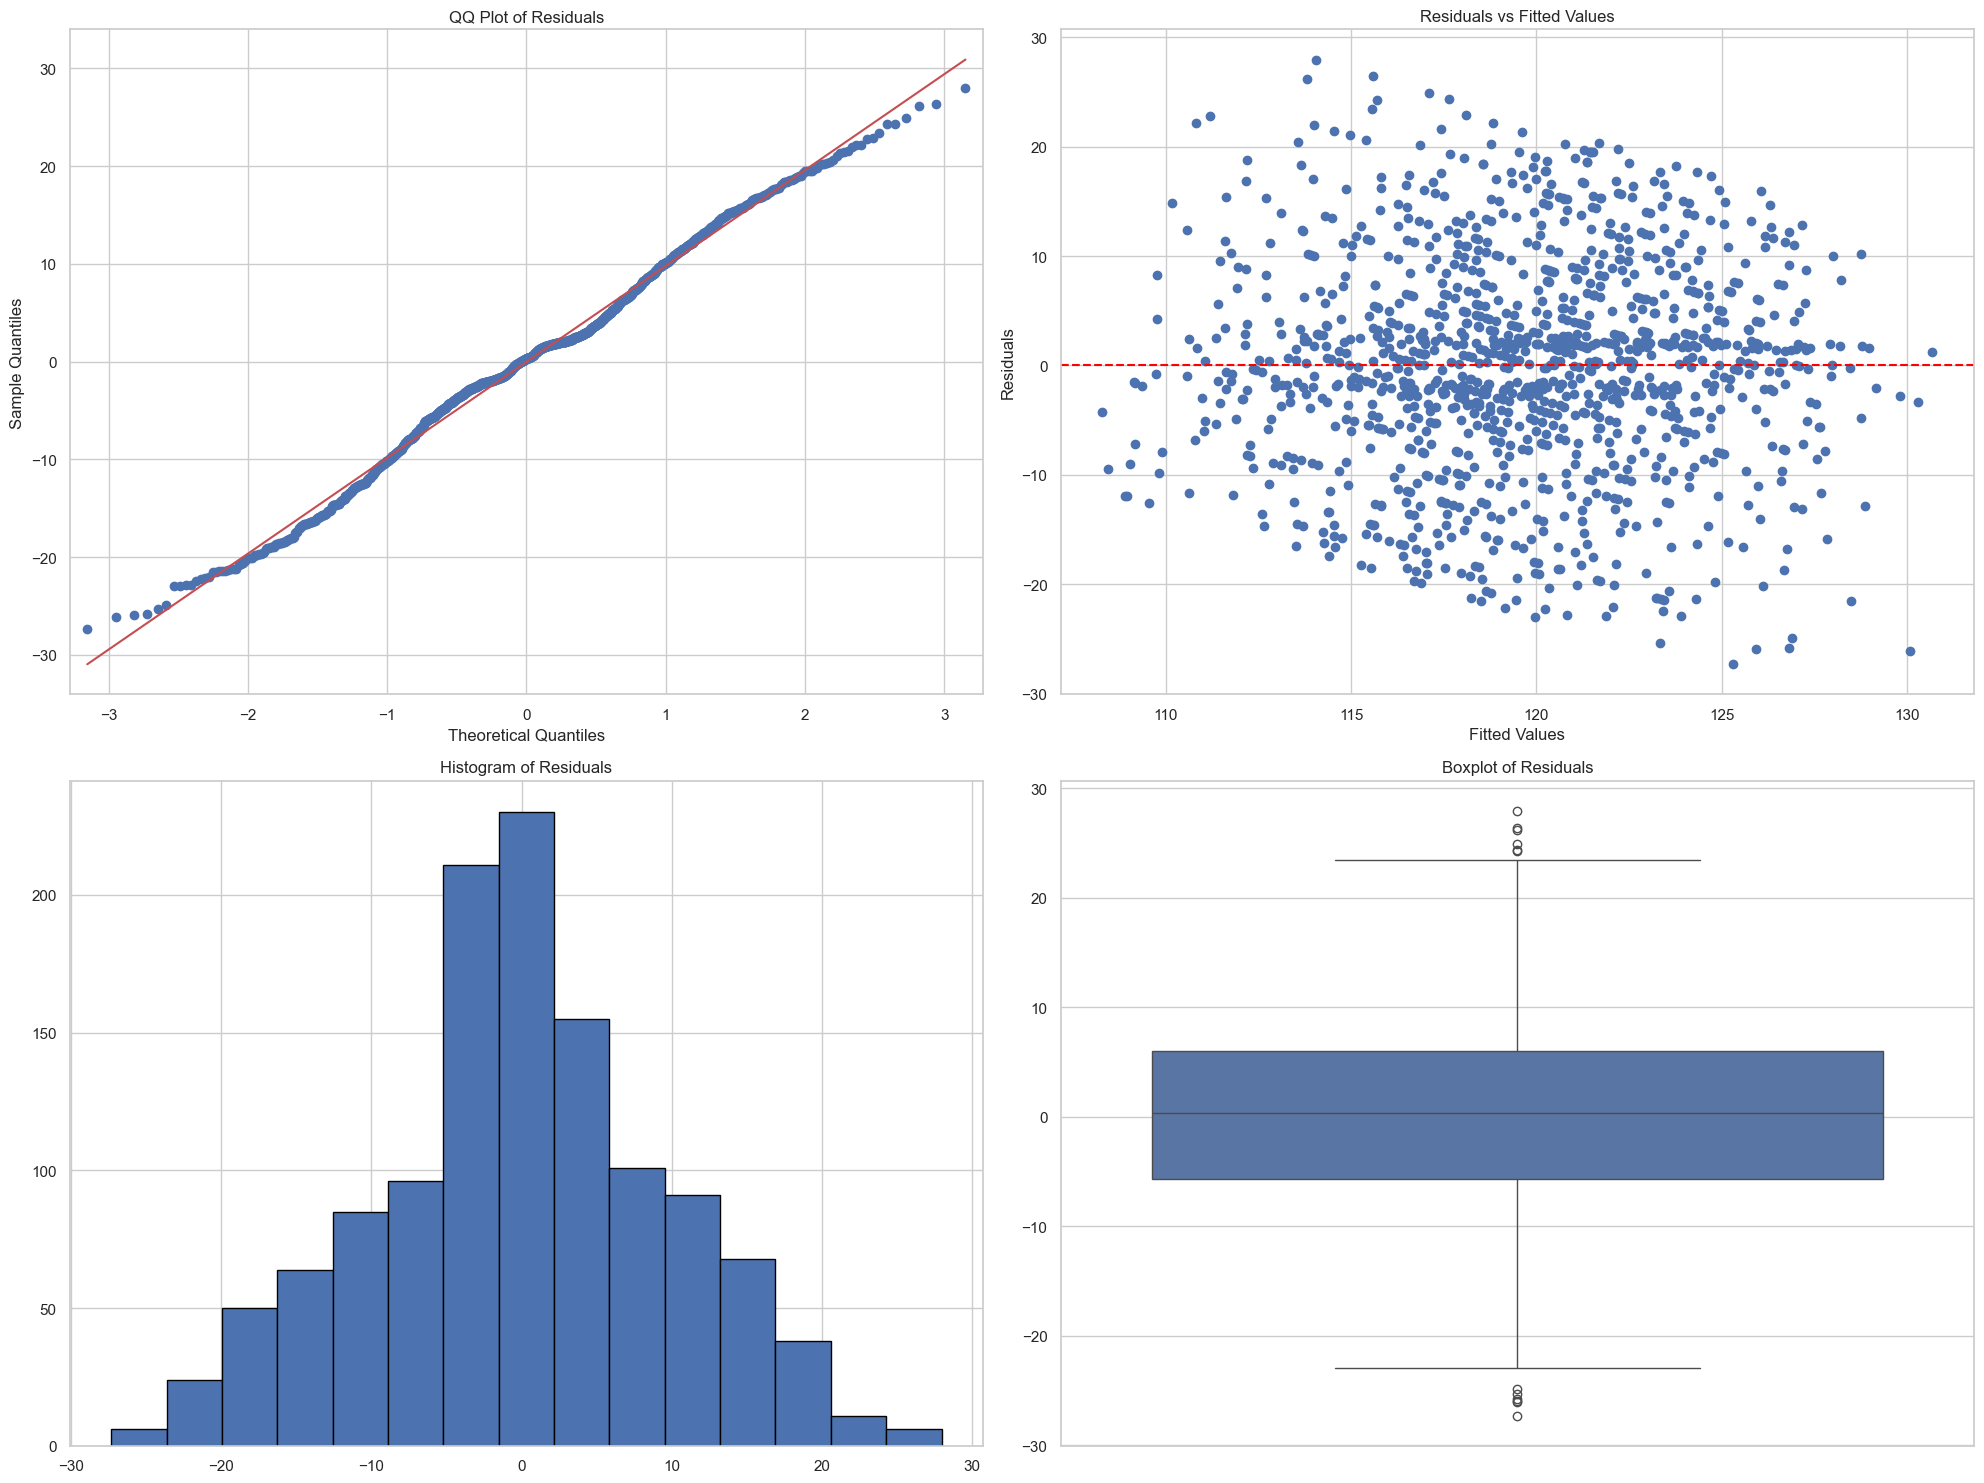

In [84]:
residuals = cdf_model_weight.resid
fitted = cdf_model_weight.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**test without Age**

In [85]:
waight =1/(cbab_model.resid**2)
cdf_model_weight_withoutage = smf.wls('(bwt) ~ gestation + weight + height',data=cdf,weights=waight).fit()
cdf_model_weight_withoutage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.989
Model:                            WLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.815e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:21   Log-Likelihood:                -4106.2
No. Observations:                1236   AIC:                             8220.
Df Residuals:                    1232   BIC:                             8241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.8771      0.981    -84.485      0.000     -84.802     -80.953
gestation      0.4895      0.002    291.925      0.000       0.486       0.493
weight         0.0919      0.001    132.956      0.000       0.091       0.093
height         0.8401      0.011     75.178      0.000       0.818       0.862
==============================================================================
Omnibus:                      482.451   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98721.768
Skew:                           0.601   Prob(JB):                         0.00
Kurtosis:                      46.766   Cond. No.                     3.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**all reject**

**Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)

Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

Reject H0**

In [86]:
bibwwage_hetro = ssd.het_breuschpagan(cdf_model_weight_withoutage.resid,cdf_model_weight_withoutage.model.exog)
bibwwage_hetro_test_statistic, bibwwage_hetro_p_value = bibwwage_hetro[:2]
bibwwage_hetro_test_statistic, bibwwage_hetro_p_value

(4.234020718114094, 0.23727776197268236)

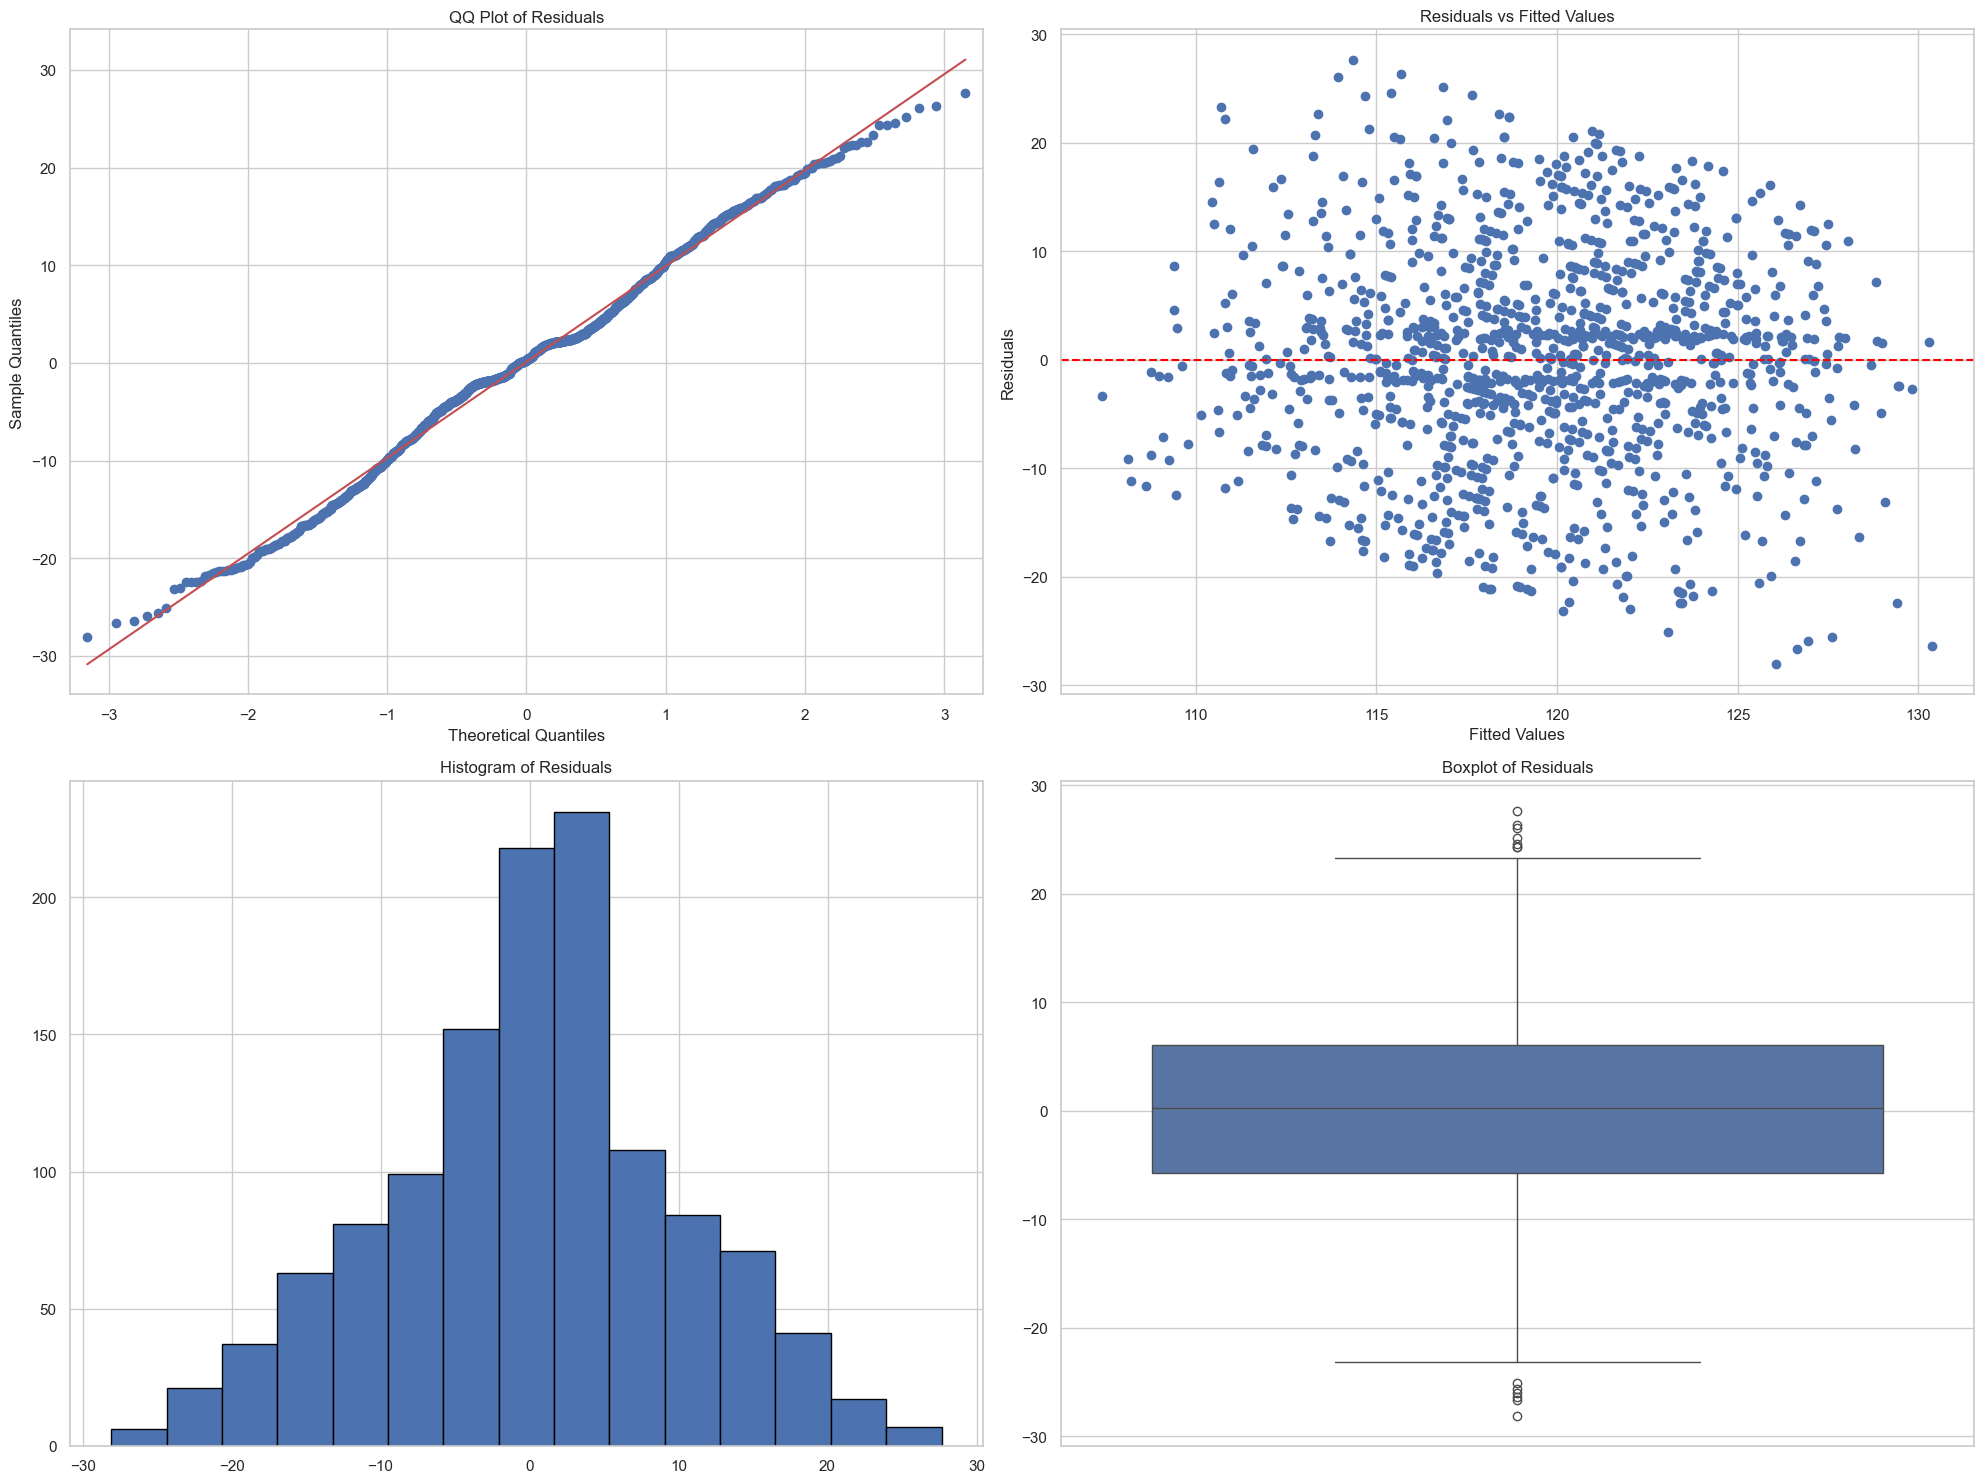

In [87]:
residuals = cdf_model_weight_withoutage.resid
fitted = cdf_model_weight_withoutage.fittedvalues

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

sns.boxplot(residuals, ax= axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()

**all reject except age accept H0**

**scatter matrix after outlier**

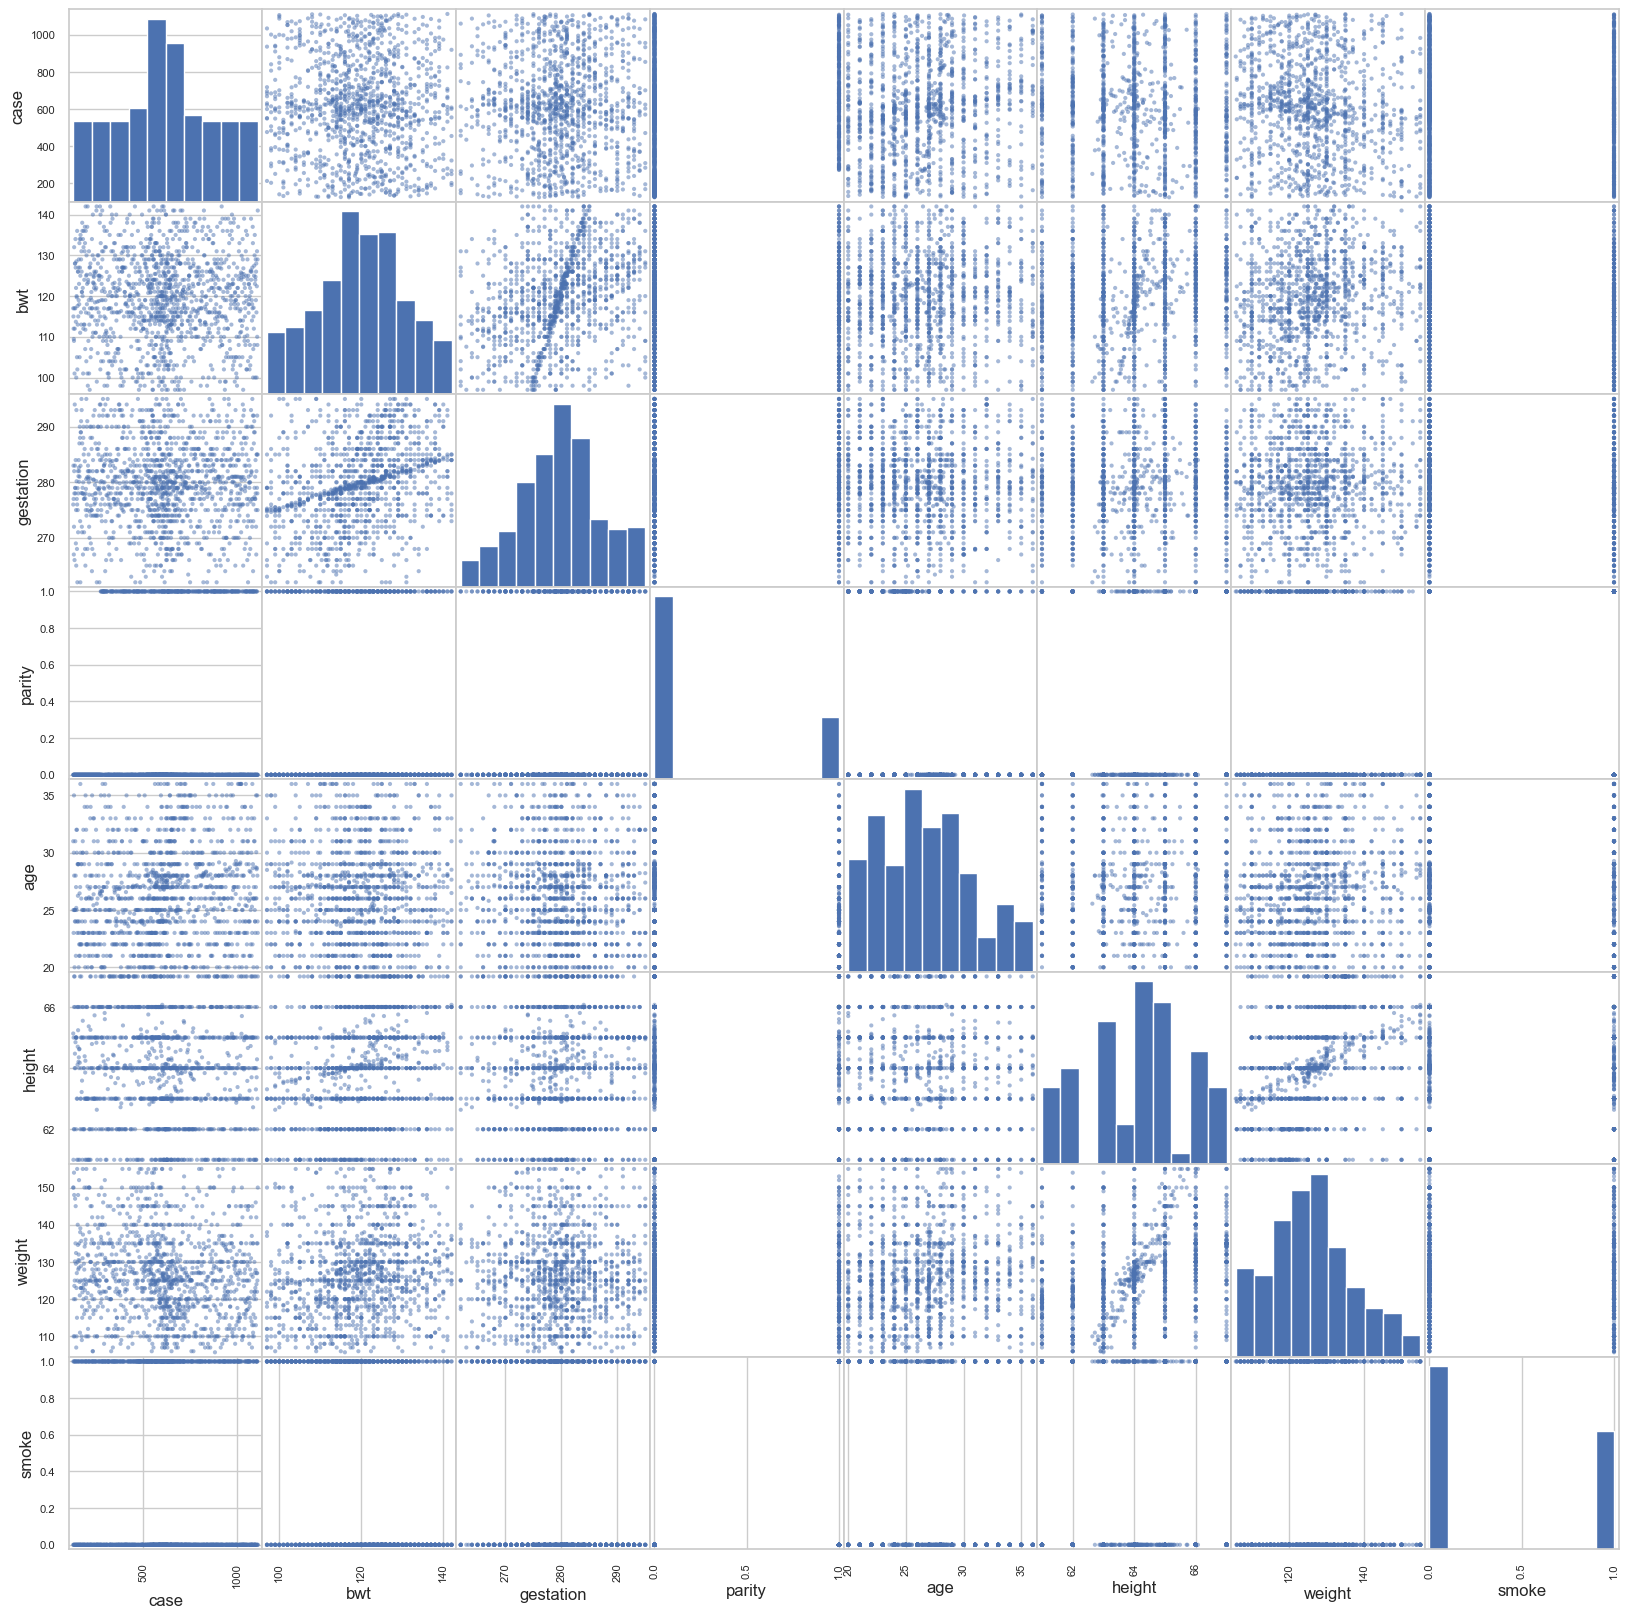

In [88]:
pd.plotting.scatter_matrix(cdf,figsize=(20,20),diagonal="hist")
plt.show()

**line chart for each variable**

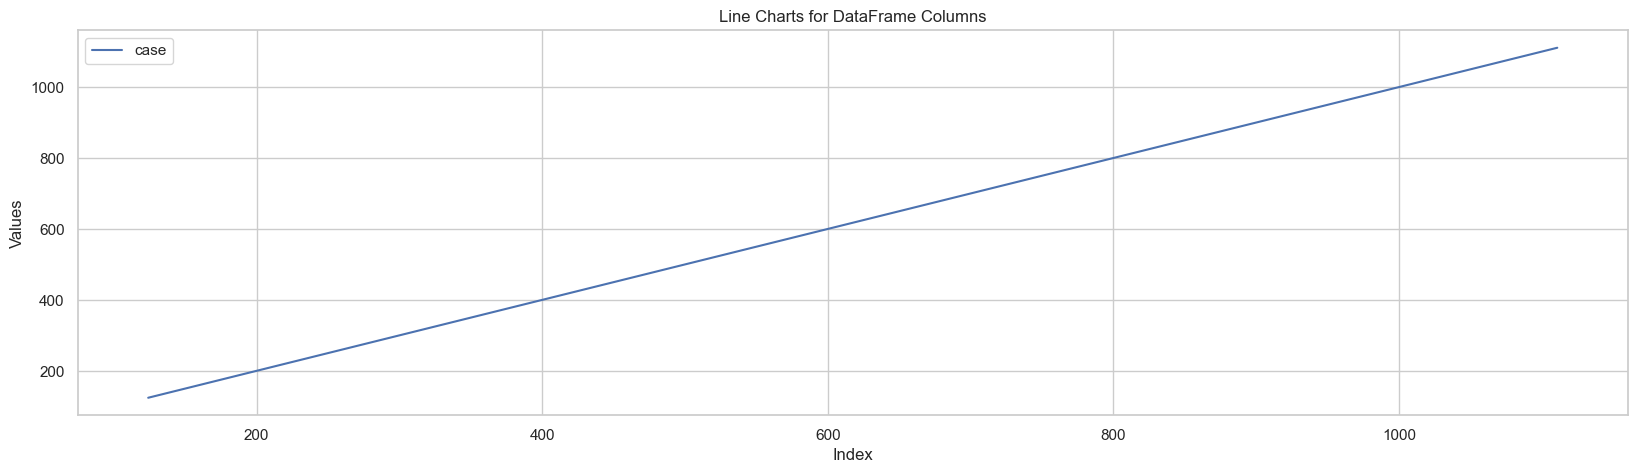

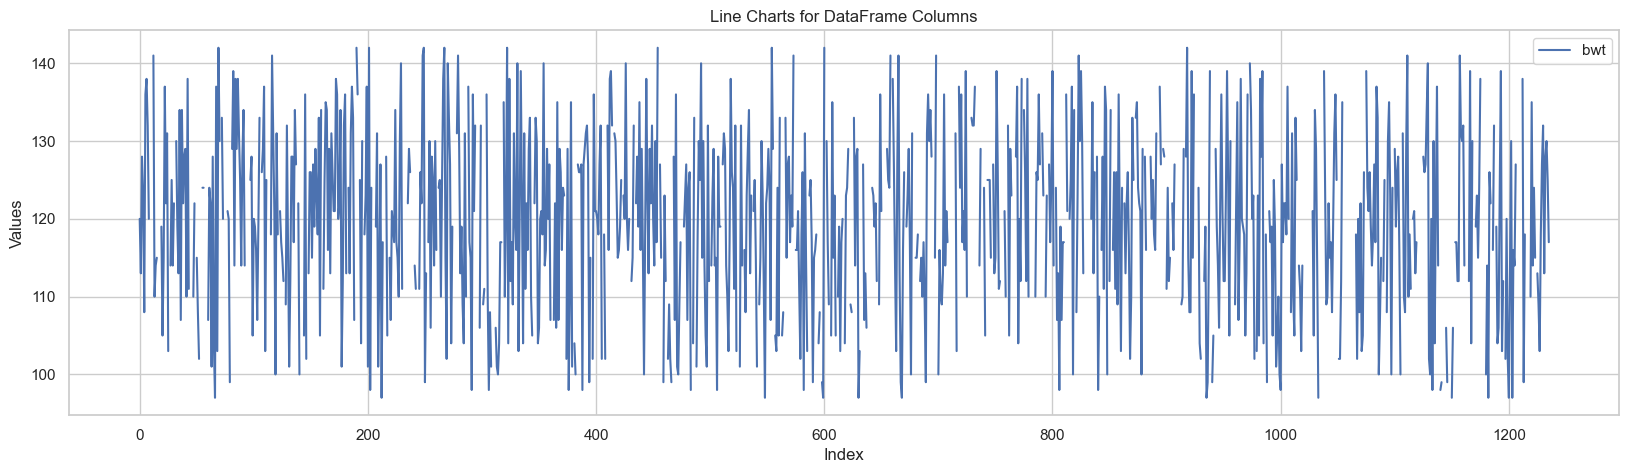

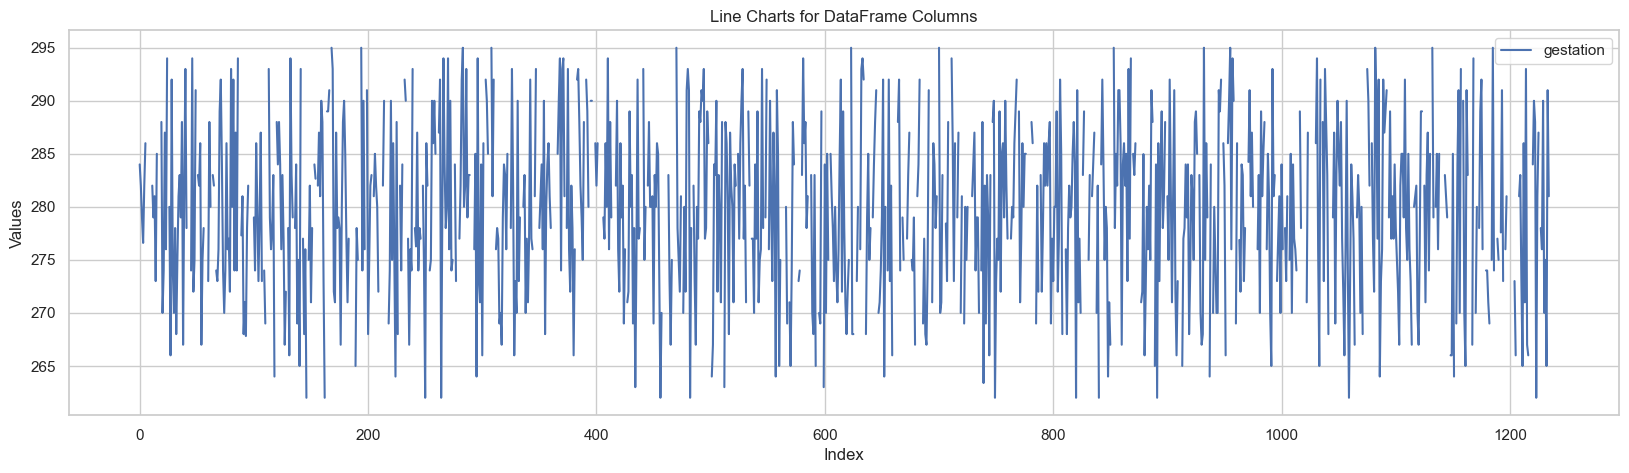

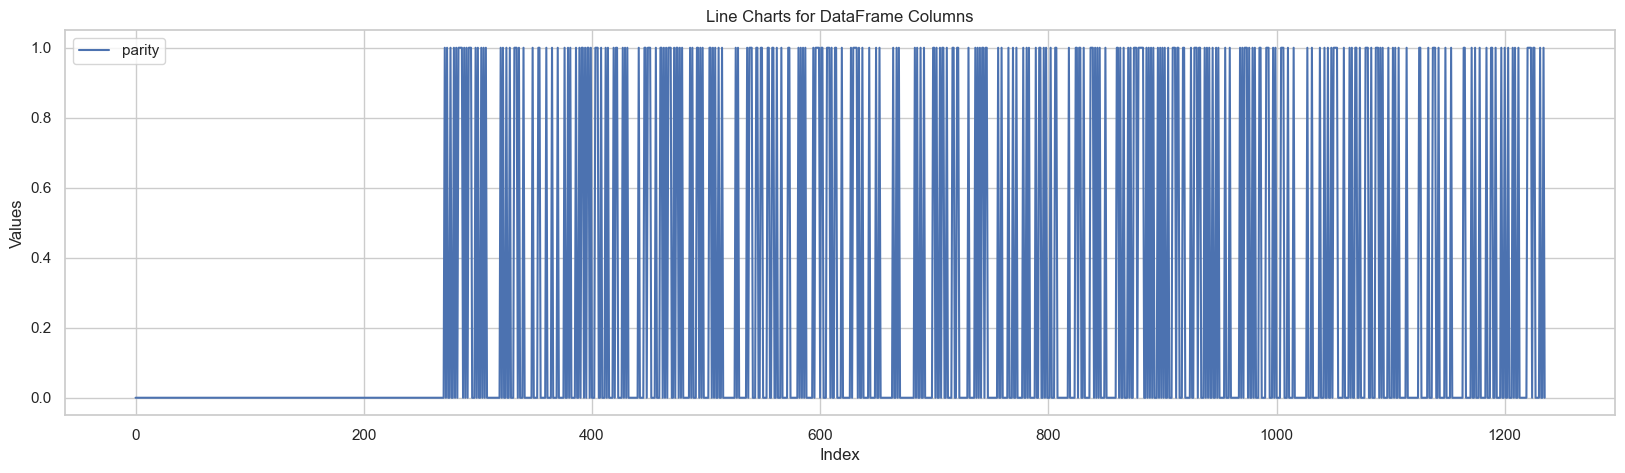

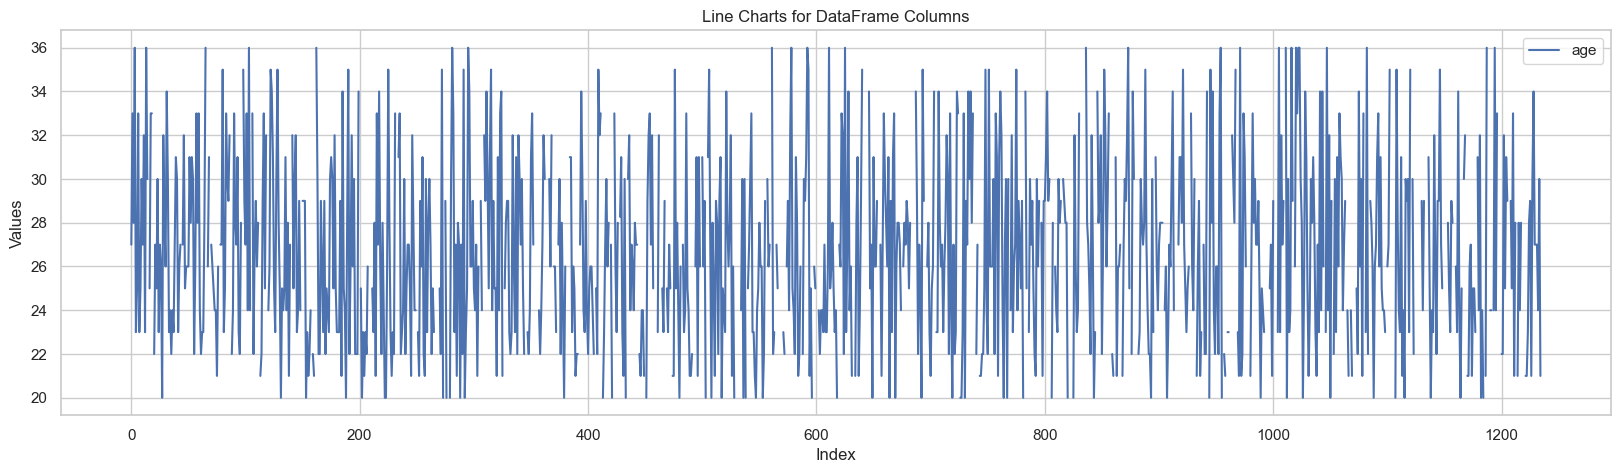

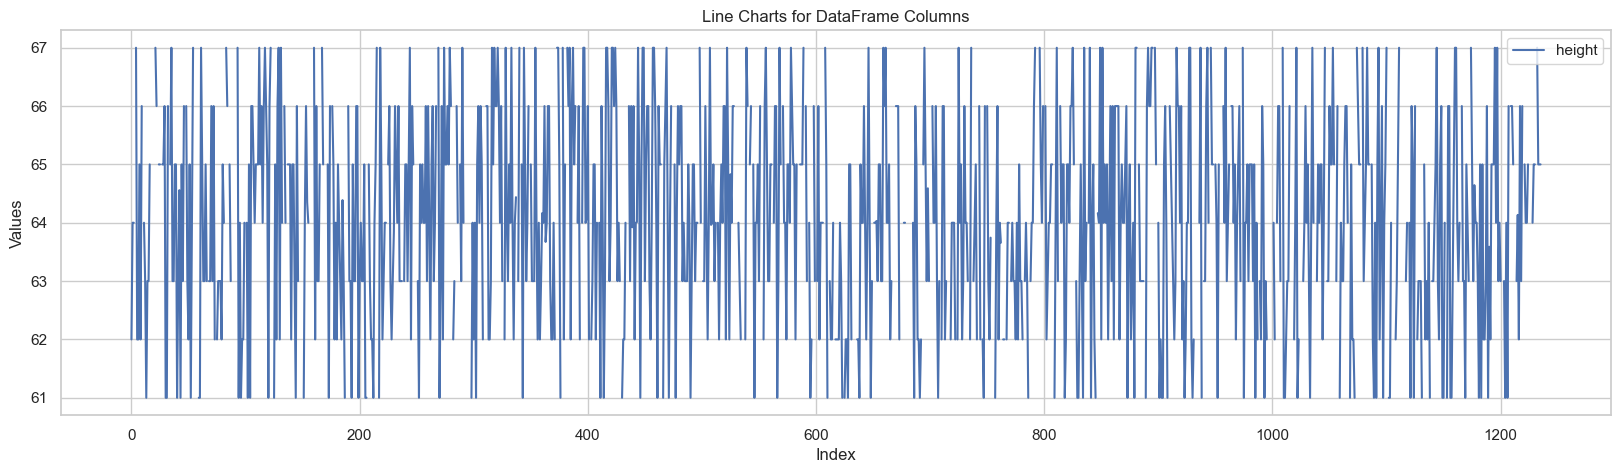

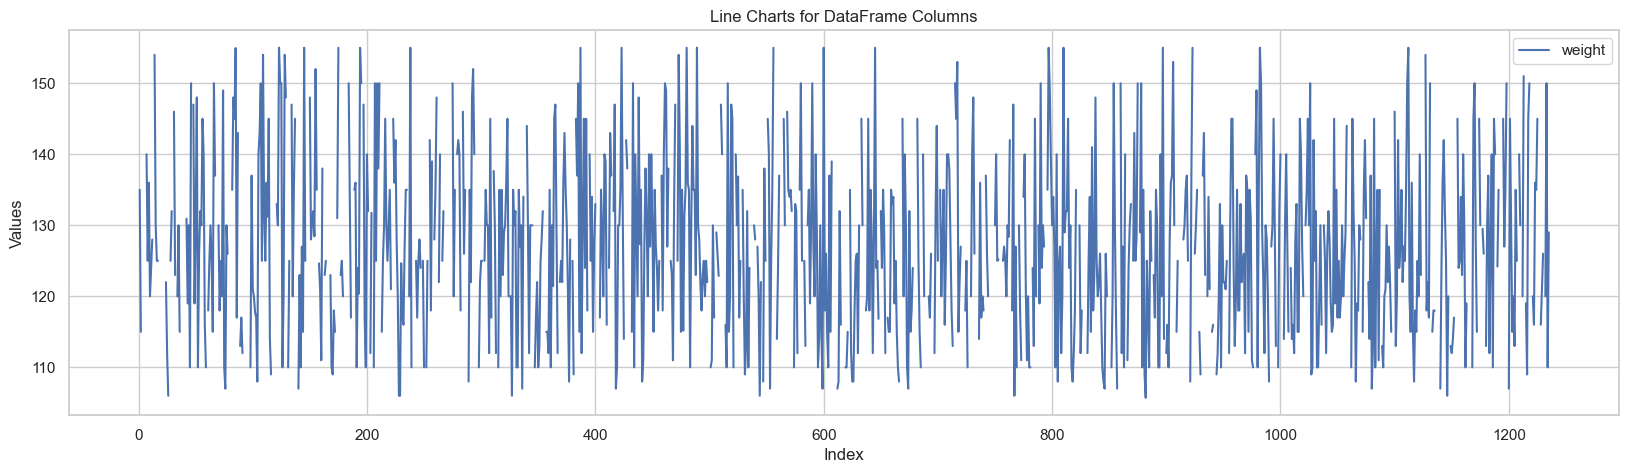

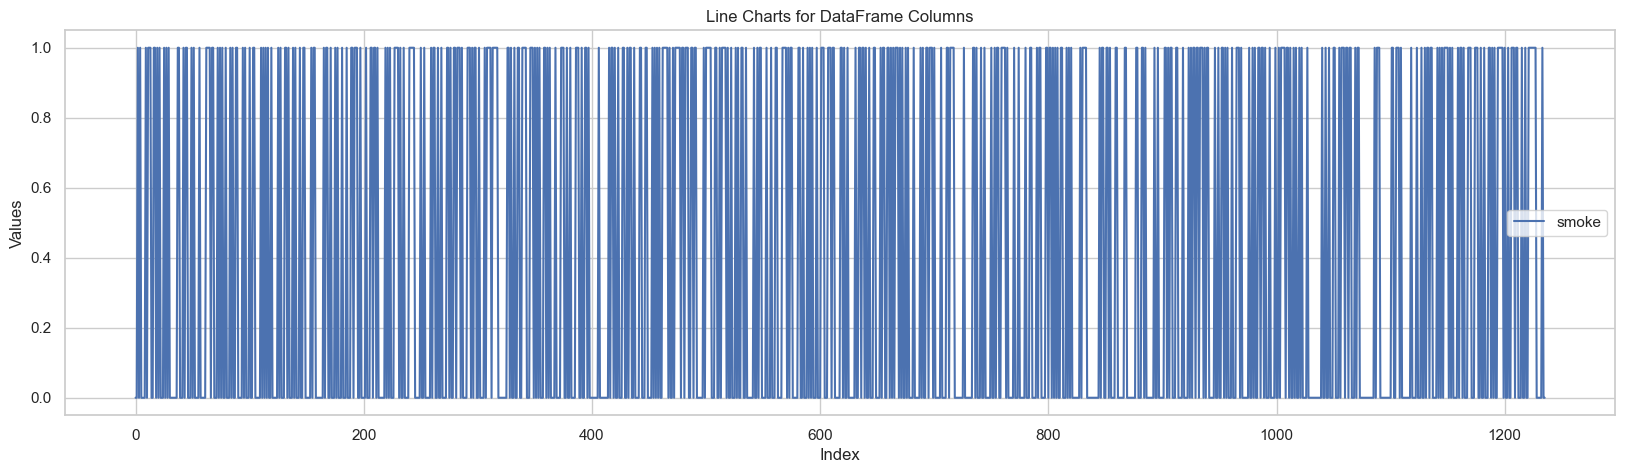

In [89]:


for column in df.columns:
    plt.figure(figsize=(20,5))
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Line Charts for DataFrame Columns')
    plt.legend()
    plt.show()



**stationarity test**

In [90]:
for i in cdf.columns:
    test =adfuller(cdf[i])
    print(test[0:2])

(-1.3709227742501693, 0.5961340221019522)
(-35.041362199939314, 0.0)
(-21.36416416392138, 0.0)
(-5.401475040840921, 3.36312456935009e-06)
(-34.509568512689995, 0.0)
(-25.08350980163748, 0.0)
(-32.21251739390837, 0.0)
(-36.288736504291386, 0.0)


# **logistic reggression**

In [91]:
bab_model2 = smf.logit('(parity)~ (age)+(weight)',data=cdf).fit()
bab_model2.summary()

Optimization terminated successfully.
         Current function value: 0.519349
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 parity   No. Observations:                 1236
Model:                          Logit   Df Residuals:                     1233
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                 0.08502
Time:                        19:40:26   Log-Likelihood:                -641.91
converged:                       True   LL-Null:                       -701.56
Covariance Type:            nonrobust   LLR p-value:                 1.248e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2019      0.886      5.872      0.000       3.466       6.938
age           -0.1942      0.020     -9.659      0.000      -0.234      -0.155
weight        -0.0098      0.006     -1.608      0.108      -0.022       0.002
==============================================================================
"""

the Pseudo R-squ is 0.08502 that mean that is not best model in the data

H0: The model is a good-fitting model.

H1: The model is not a good-fitting model.

in this model we reject all H0 

In [92]:
parity_model = smf.logit("parity ~ gestation", data = cdf).fit()
parity_model.summary()

Optimization terminated successfully.
         Current function value: 0.565265
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 parity   No. Observations:                 1236
Model:                          Logit   Df Residuals:                     1234
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                0.004123
Time:                        19:40:26   Log-Likelihood:                -698.67
converged:                       True   LL-Null:                       -701.56
Covariance Type:            nonrobust   LLR p-value:                   0.01616
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1460      2.540     -2.814      0.005     -12.123      -2.169
gestation      0.0217      0.009      2.395      0.017       0.004       0.039
==============================================================================
"""

the Pseudo R-squ is 0.08502 that mean that is not best model in the data

H0: The model is a good-fitting model.

H1: The model is not a good-fitting model.

in this model we reject all H0 

# **Anova**

In [93]:
smoke_modlano = smf.ols("bwt ~ smoke", data = cdf).fit()
smoke_modlano.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     80.32
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.15e-18
Time:                        19:40:26   Log-Likelihood:                -4638.8
No. Observations:                1236   AIC:                             9282.
Df Residuals:                    1234   BIC:                             9292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.7509      0.377    323.234      0.000     121.012     122.490
smoke         -5.3946      0.602     -8.962      0.000      -6.576      -4.214
==============================================================================
Omnibus:                       17.004   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.324
Skew:                          -0.091   Prob(JB):                      0.00348
Kurtosis:                       2.568   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
av.anova_lm(smoke_modlano)

df         sum_sq      mean_sq          F        PR(>F)
smoke        1.0    8569.719971  8569.719971  80.322829  1.148613e-18
Residual  1234.0  131656.648459   106.690963        NaN           NaN

H0:all mean are equal

H1:at least two population means are different2

reject H0

In [95]:
bwt_anova = smf.ols("bwt ~ smoke +weight" , data = cdf).fit()

In [96]:
bwt_anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     56.48
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           3.41e-24
Time:                        19:40:26   Log-Likelihood:                -4623.6
No. Observations:                1236   AIC:                             9253.
Df Residuals:                    1233   BIC:                             9269.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.8060      3.260     31.839      0.000      97.410     110.202
smoke         -5.2970      0.595     -8.902      0.000      -6.464      -4.130
weight         0.1412      0.025      5.540      0.000       0.091       0.191
==============================================================================
Omnibus:                        9.663   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                7.241
Skew:                          -0.073   Prob(JB):                       0.0268
Kurtosis:                       2.655   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
av.anova_lm(bwt_anova)

df         sum_sq      mean_sq          F        PR(>F)
smoke        1.0    8569.719971  8569.719971  82.255711  4.593280e-19
weight       1.0    3197.911230  3197.911230  30.694872  3.688375e-08
Residual  1233.0  128458.737228   104.183891        NaN           NaN

H0:all mean are equal

H1:at least two population means are different2

reject H0

In [98]:
bwt_anova = smf.ols("bwt ~ smoke +weight+smoke:weight" , data = cdf).fit()

In [99]:
av.anova_lm(bwt_anova)

df         sum_sq      mean_sq          F        PR(>F)
smoke            1.0    8569.719971  8569.719971  82.254882  4.599898e-19
weight           1.0    3197.911230  3197.911230  30.694563  3.689538e-08
smoke:weight     1.0     102.890794   102.890794   0.987578  3.205301e-01
Residual      1232.0  128355.846434   104.184940        NaN           NaN

H0:all mean are equal

H1:at least two population means are different2

reject H0 We reject the hypothesis that the mean percent of  is the same for all
four groups.

In [100]:
tukey = pairwise_tukeyhsd(endog=cdf['bwt'],groups=cdf['smoke'],alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.0    1.0  -5.3946   0.0 -6.5755 -4.2137   True
---------------------------------------------------
